In [105]:
# Here we import all libraries
import numpy as np
import gym
import matplotlib.pyplot as plt
import os
import torch
import random
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from collections import deque 
import sys
env = gym.make("CartPole-v0")

In [106]:
#Hyperparameters
episodes = 20000
eps = 1.0
learning_rate = 0.001
discount_factor = 0.99
tot_rewards = []
decay_val = 0.00001
mem_size = 5000
batch_size = 200
gamma = 0.99
max_steps = 200

In [107]:
class NeuralNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super(NeuralNetwork, self).__init__()
        self.state_size = state_size
        self.action_size = action_size
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(state_size, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, action_size)
        )
    def forward(self, x):
        x = self.linear_relu_stack(x)
        return x

In [108]:
model = NeuralNetwork(env.observation_space.shape[0], env.action_space.n)
opt = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
loss = nn.MSELoss()
replay_buffer = deque(maxlen=mem_size)

In [109]:
#Testing code

# state = torch.tensor(env.reset(), dtype=torch.float32)
# print("state = ", state)
# out = model(state)
# print("out = ", out)

In [110]:
def compute_td_loss(batch_size):
    state, next_state, reward, done, action = zip(*random.sample(replay_buffer, batch_size))
    state = torch.stack(list(state), dim=0).reshape(batch_size, -1)
    
    next_state = torch.from_numpy(np.array(next_state).reshape(batch_size, -1)).type(torch.float32)
    
    reward = torch.from_numpy(np.array(reward))
    done = torch.from_numpy(np.array(done)).long()
    action = torch.from_numpy(np.array(action)).type(torch.int64)
    
    q_values = model(state)
    next_q_values = model(next_state)

    q_vals = q_values.gather(dim=-1, index=action.reshape(-1,1)).reshape(-1, 1)
    max_next_q_values = torch.max(next_q_values,-1)[0].detach()

    loss = 0.5*((reward + gamma*max_next_q_values*(1-done) - q_vals)**2).mean()

    opt.zero_grad()
    loss.backward()
    opt.step()
    return loss
    

Episode =  0  Epsilon =  1.0


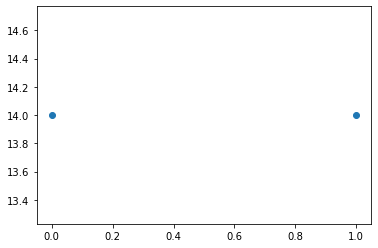

Episode =  1  Epsilon =  0.9998600104994392
Episode =  2  Epsilon =  0.9997400350967227
Episode =  3  Epsilon =  0.9990704369616121
Episode =  4  Epsilon =  0.9989205883842328
Episode =  5  Epsilon =  0.9986708906991326
Episode =  6  Epsilon =  0.998411271317626
Episode =  7  Epsilon =  0.9976328180544936
Episode =  8  Epsilon =  0.9973834422701272
Episode =  9  Epsilon =  0.9972737366739224
Episode =  10  Epsilon =  0.9971540716038928
Episode =  11  Epsilon =  0.9970045104583221
Episode =  12  Epsilon =  0.9968948465421155
Episode =  13  Epsilon =  0.9966855216508458
Episode =  14  Epsilon =  0.9964862054753754
Episode =  15  Epsilon =  0.9962769663892909
Episode =  16  Epsilon =  0.996107614547076
Episode =  17  Epsilon =  0.9956992961776832
Episode =  18  Epsilon =  0.9955300425305661
Episode =  19  Epsilon =  0.995311051106103
Episode =  20  Epsilon =  0.9951816697263363
Episode =  21  Epsilon =  0.9950423547414239
Episode =  22  Epsilon =  0.9947836786519165
Episode =  23  Epsilon

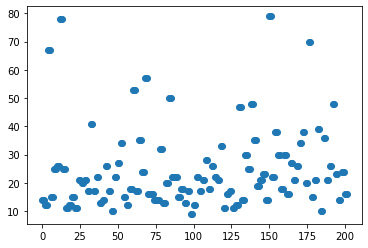

Episode =  101  Epsilon =  0.9755051144798974
Episode =  102  Epsilon =  0.9751442461566328
Episode =  103  Epsilon =  0.9750174862780006
Episode =  104  Epsilon =  0.9749004917844281
Episode =  105  Epsilon =  0.9747445209635928
Episode =  106  Epsilon =  0.9745495925275327
Episode =  107  Epsilon =  0.9744521429280876
Episode =  108  Epsilon =  0.9743254730165772
Episode =  109  Epsilon =  0.974189077680226
Episode =  110  Epsilon =  0.9740234804411685
Episode =  111  Epsilon =  0.9737313186842955
Episode =  112  Epsilon =  0.9736339509077346
Episode =  113  Epsilon =  0.9735171224276152
Episode =  114  Epsilon =  0.9733029732886929
Episode =  115  Epsilon =  0.9729331902709759
Episode =  116  Epsilon =  0.9728261740411263
Episode =  117  Epsilon =  0.9726608084748358
Episode =  118  Epsilon =  0.9724565721717972
Episode =  119  Epsilon =  0.9722912694321701
Episode =  120  Epsilon =  0.9721843238093762
Episode =  121  Epsilon =  0.9719899073589868
Episode =  122  Epsilon =  0.971805

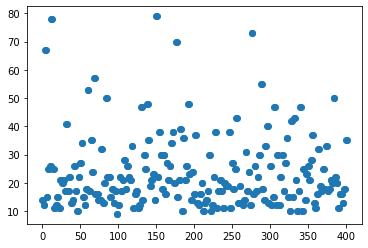

Episode =  201  Epsilon =  0.9540494592483455
Episode =  202  Epsilon =  0.9538586693900641
Episode =  203  Epsilon =  0.9536965280093803
Episode =  204  Epsilon =  0.9535058087299357
Episode =  205  Epsilon =  0.953315127590342
Episode =  206  Epsilon =  0.9531530786034483
Episode =  207  Epsilon =  0.952924350456696
Episode =  208  Epsilon =  0.9528004789623137
Episode =  209  Epsilon =  0.9526289911679013
Episode =  210  Epsilon =  0.9525146831191199
Episode =  211  Epsilon =  0.9523146770370662
Episode =  212  Epsilon =  0.9521908847946807
Episode =  213  Epsilon =  0.9520671086441602
Episode =  214  Epsilon =  0.951914790854112
Episode =  215  Epsilon =  0.9514484691963315
Episode =  216  Epsilon =  0.9513343028009787
Episode =  217  Epsilon =  0.9510584572319306
Episode =  218  Epsilon =  0.9509063008123914
Episode =  219  Epsilon =  0.9508112154120849
Episode =  220  Epsilon =  0.950373945019241
Episode =  221  Epsilon =  0.9501553852400202
Episode =  222  Epsilon =  0.949917877

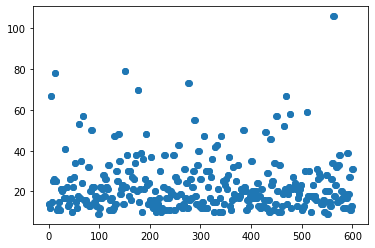

Episode =  301  Epsilon =  0.9324780650710981
Episode =  302  Epsilon =  0.9323288812616269
Episode =  303  Epsilon =  0.9321331137317069
Episode =  304  Epsilon =  0.9317976078829642
Episode =  305  Epsilon =  0.931518111924565
Episode =  306  Epsilon =  0.9312852626681963
Episode =  307  Epsilon =  0.9308290469525389
Episode =  308  Epsilon =  0.9305684526072712
Episode =  309  Epsilon =  0.9304195743098248
Episode =  310  Epsilon =  0.9302242076902629
Episode =  311  Epsilon =  0.9301032870078795
Episode =  312  Epsilon =  0.9299916818679049
Episode =  313  Epsilon =  0.9298800901196768
Episode =  314  Epsilon =  0.9292294050763434
Episode =  315  Epsilon =  0.9291179047953847
Episode =  316  Epsilon =  0.9289971279223108
Episode =  317  Epsilon =  0.928894944369354
Episode =  318  Epsilon =  0.9286256052382404
Episode =  319  Epsilon =  0.9280871612432673
Episode =  320  Epsilon =  0.9278366127880335
Episode =  321  Epsilon =  0.9272337179662299
Episode =  322  Epsilon =  0.9271409

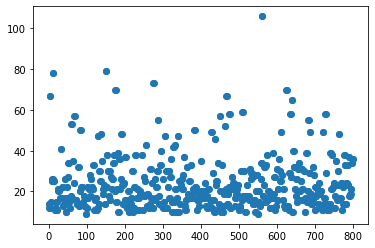

Episode =  401  Epsilon =  0.9096189291476302
Episode =  402  Epsilon =  0.9094188359947346
Episode =  403  Epsilon =  0.9091369612577875
Episode =  404  Epsilon =  0.9089642425075407
Episode =  405  Epsilon =  0.9084917063341632
Episode =  406  Epsilon =  0.9082101189614299
Episode =  407  Epsilon =  0.9080738983414886
Episode =  408  Epsilon =  0.9079467775299874
Episode =  409  Epsilon =  0.9077107432337859
Episode =  410  Epsilon =  0.9075927490969197
Episode =  411  Epsilon =  0.9074203237176452
Episode =  412  Epsilon =  0.9070483595026112
Episode =  413  Epsilon =  0.9067853549308805
Episode =  414  Epsilon =  0.906667481086073
Episode =  415  Epsilon =  0.9065133614854214
Episode =  416  Epsilon =  0.9064136509983863
Episode =  417  Epsilon =  0.9061689535717395
Episode =  418  Epsilon =  0.9060239788623256
Episode =  419  Epsilon =  0.9057975023107376
Episode =  420  Epsilon =  0.905706927542193
Episode =  421  Epsilon =  0.905525805175134
Episode =  422  Epsilon =  0.90526324

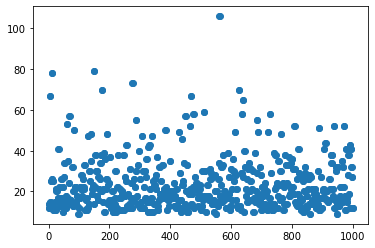

Episode =  501  Epsilon =  0.8892121678848587
Episode =  502  Epsilon =  0.8891232515585408
Episode =  503  Epsilon =  0.8886965769412593
Episode =  504  Epsilon =  0.8885543975744962
Episode =  505  Epsilon =  0.888323404616474
Episode =  506  Epsilon =  0.8881724032281756
Episode =  507  Epsilon =  0.8879503889903725
Episode =  508  Epsilon =  0.8877816952863397
Episode =  509  Epsilon =  0.8877106759466239
Episode =  510  Epsilon =  0.8875154020551979
Episode =  511  Epsilon =  0.8873290443207991
Episode =  512  Epsilon =  0.8872136996193268
Episode =  513  Epsilon =  0.8870894990166264
Episode =  514  Epsilon =  0.886983055195719
Episode =  515  Epsilon =  0.8866017363779947
Episode =  516  Epsilon =  0.8863180706296184
Episode =  517  Epsilon =  0.8861851335542372
Episode =  518  Epsilon =  0.8859901952435443
Episode =  519  Epsilon =  0.8858750245802697
Episode =  520  Epsilon =  0.8857687264868223
Episode =  521  Epsilon =  0.8856181593547217
Episode =  522  Epsilon =  0.8851843

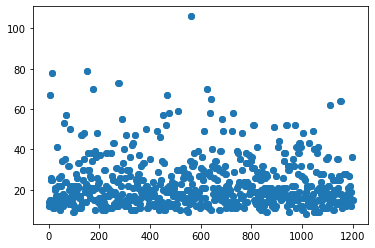

Episode =  601  Epsilon =  0.8709599287586975
Episode =  602  Epsilon =  0.8708031708639418
Episode =  603  Epsilon =  0.8706638541988151
Episode =  604  Epsilon =  0.8705332650680586
Episode =  605  Epsilon =  0.8704201036650556
Episode =  606  Epsilon =  0.8701677196943535
Episode =  607  Epsilon =  0.8699502060423341
Episode =  608  Epsilon =  0.8698284221474775
Episode =  609  Epsilon =  0.869602297285846
Episode =  610  Epsilon =  0.8694805620945623
Episode =  611  Epsilon =  0.8692371428345551
Episode =  612  Epsilon =  0.869028551995128
Episode =  613  Epsilon =  0.8689329645897479
Episode =  614  Epsilon =  0.8687591962430831
Episode =  615  Epsilon =  0.8686375790770932
Episode =  616  Epsilon =  0.8684551852494754
Episode =  617  Epsilon =  0.8681686437529934
Episode =  618  Epsilon =  0.8679689889243868
Episode =  619  Epsilon =  0.8678908756211003
Episode =  620  Epsilon =  0.8677520248836076
Episode =  621  Epsilon =  0.8675958443566979
Episode =  622  Epsilon =  0.8674223

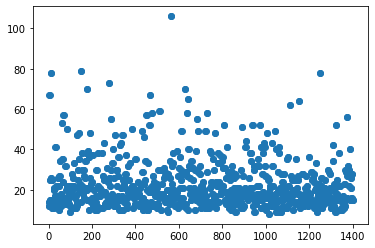

Episode =  701  Epsilon =  0.8529202712011013
Episode =  702  Epsilon =  0.852758232553923
Episode =  703  Epsilon =  0.8525706473158174
Episode =  704  Epsilon =  0.8524257233492776
Episode =  705  Epsilon =  0.8522723012945819
Episode =  706  Epsilon =  0.8521700352658396
Episode =  707  Epsilon =  0.8520848229490601
Episode =  708  Epsilon =  0.85196554002026
Episode =  709  Epsilon =  0.8515226353191689
Episode =  710  Epsilon =  0.8513353218811969
Episode =  711  Epsilon =  0.8512416806143591
Episode =  712  Epsilon =  0.8511054935216522
Episode =  713  Epsilon =  0.8509097627466948
Episode =  714  Epsilon =  0.8506800492720318
Episode =  715  Epsilon =  0.8505439520327019
Episode =  716  Epsilon =  0.8502548176903018
Episode =  717  Epsilon =  0.850161295271794
Episode =  718  Epsilon =  0.8500677831401349
Episode =  719  Epsilon =  0.849829798670155
Episode =  720  Epsilon =  0.8495833849923152
Episode =  721  Epsilon =  0.8494304745099229
Episode =  722  Epsilon =  0.8492775915

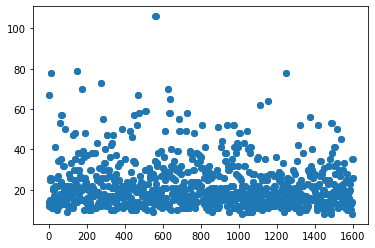

Episode =  801  Epsilon =  0.8356134927448201
Episode =  802  Epsilon =  0.8354798059496416
Episode =  803  Epsilon =  0.835128979863903
Episode =  804  Epsilon =  0.8349452726154049
Episode =  805  Epsilon =  0.8347532582452712
Episode =  806  Epsilon =  0.8344528026598265
Episode =  807  Epsilon =  0.8342525590186015
Episode =  808  Epsilon =  0.8341524552183851
Episode =  809  Epsilon =  0.8339939820996799
Episode =  810  Epsilon =  0.8338438774432474
Episode =  811  Epsilon =  0.833710473762452
Episode =  812  Epsilon =  0.8336271073002994
Episode =  813  Epsilon =  0.8335020732371621
Episode =  814  Epsilon =  0.8333437236786769
Episode =  815  Epsilon =  0.8330437754318134
Episode =  816  Epsilon =  0.8325524270230771
Episode =  817  Epsilon =  0.8322361187847165
Episode =  818  Epsilon =  0.8319864866439315
Episode =  819  Epsilon =  0.831836743302355
Episode =  820  Epsilon =  0.8316953437822887
Episode =  821  Epsilon =  0.831470817474511
Episode =  822  Epsilon =  0.831279602

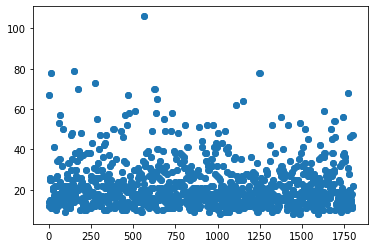

Episode =  901  Epsilon =  0.8164096843888343
Episode =  902  Epsilon =  0.8163117215944055
Episode =  903  Epsilon =  0.8161566378761388
Episode =  904  Epsilon =  0.815968944373472
Episode =  905  Epsilon =  0.8158302421364618
Episode =  906  Epsilon =  0.8155773752221268
Episode =  907  Epsilon =  0.8152593636521301
Episode =  908  Epsilon =  0.814990373792838
Episode =  909  Epsilon =  0.8148762836974486
Episode =  910  Epsilon =  0.8147133255518552
Episode =  911  Epsilon =  0.814550399994469
Episode =  912  Epsilon =  0.8144037948503522
Episode =  913  Epsilon =  0.8143060727470228
Episode =  914  Epsilon =  0.8142083623695833
Episode =  915  Epsilon =  0.8140862408851739
Episode =  916  Epsilon =  0.8139885568858434
Episode =  917  Epsilon =  0.813890884607831
Episode =  918  Epsilon =  0.8137525356091886
Episode =  919  Epsilon =  0.813671164831087
Episode =  920  Epsilon =  0.8134840429186273
Episode =  921  Epsilon =  0.8133782973953817
Episode =  922  Epsilon =  0.8132563004

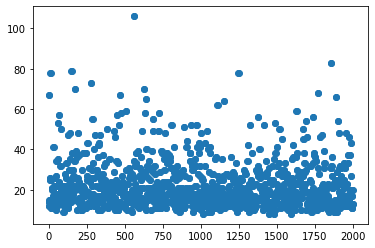

Episode =  1001  Epsilon =  0.7990123487258491
Episode =  1002  Epsilon =  0.7989004953862091
Episode =  1003  Epsilon =  0.7987567069573265
Episode =  1004  Epsilon =  0.7985730149585731
Episode =  1005  Epsilon =  0.7982775990754221
Episode =  1006  Epsilon =  0.7981578670143482
Episode =  1007  Epsilon =  0.798078055617339
Episode =  1008  Epsilon =  0.7979902722983074
Episode =  1009  Epsilon =  0.7979024986348615
Episode =  1010  Epsilon =  0.7977748450859021
Episode =  1011  Epsilon =  0.7975913788882819
Episode =  1012  Epsilon =  0.797471749752002
Episode =  1013  Epsilon =  0.7973122721477294
Episode =  1014  Epsilon =  0.7967463841779373
Episode =  1015  Epsilon =  0.7966428143980231
Episode =  1016  Epsilon =  0.7964516440197797
Episode =  1017  Epsilon =  0.7962207076850794
Episode =  1018  Epsilon =  0.796101284133033
Episode =  1019  Epsilon =  0.7960216783830011
Episode =  1020  Epsilon =  0.795448751917467
Episode =  1021  Epsilon =  0.7950908822951507
Episode =  1022  

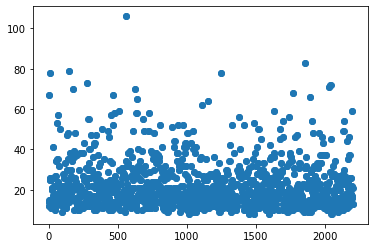

Episode =  1101  Epsilon =  0.7819388252246602
Episode =  1102  Epsilon =  0.7817668184645793
Episode =  1103  Epsilon =  0.7816495628224791
Episode =  1104  Epsilon =  0.781454175833097
Episode =  1105  Epsilon =  0.7813682210311288
Episode =  1106  Epsilon =  0.7811729043680516
Episode =  1107  Epsilon =  0.7808761165415852
Episode =  1108  Epsilon =  0.7806340836726511
Episode =  1109  Epsilon =  0.780384321978683
Episode =  1110  Epsilon =  0.7802828791179673
Episode =  1111  Epsilon =  0.7800956346334357
Episode =  1112  Epsilon =  0.7799708299405577
Episode =  1113  Epsilon =  0.7798226503012764
Episode =  1114  Epsilon =  0.7796511090461439
Episode =  1115  Epsilon =  0.7795185802855118
Episode =  1116  Epsilon =  0.7794328383862795
Episode =  1117  Epsilon =  0.7792535903440031
Episode =  1118  Epsilon =  0.7791834610273843
Episode =  1119  Epsilon =  0.77907438352383
Episode =  1120  Epsilon =  0.7789964803702147
Episode =  1121  Epsilon =  0.7787238806728095
Episode =  1122  

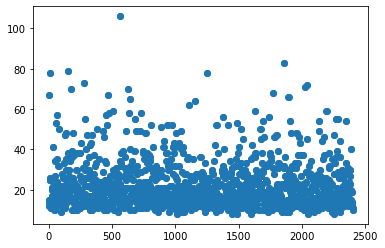

Episode =  1201  Epsilon =  0.7651995251976561
Episode =  1202  Epsilon =  0.7648552645970599
Episode =  1203  Epsilon =  0.7647099566280183
Episode =  1204  Epsilon =  0.7645188039896971
Episode =  1205  Epsilon =  0.7642665556688806
Episode =  1206  Epsilon =  0.764182491391697
Episode =  1207  Epsilon =  0.7640143905758602
Episode =  1208  Epsilon =  0.7639227148080249
Episode =  1209  Epsilon =  0.7637928596337841
Episode =  1210  Epsilon =  0.7636935735121986
Episode =  1211  Epsilon =  0.7635713929260453
Episode =  1212  Epsilon =  0.7634339631315183
Episode =  1213  Epsilon =  0.7633499904340193
Episode =  1214  Epsilon =  0.7632583943890187
Episode =  1215  Epsilon =  0.7631744410029223
Episode =  1216  Epsilon =  0.7631057587373906
Episode =  1217  Epsilon =  0.7628921201039385
Episode =  1218  Epsilon =  0.7627243031371415
Episode =  1219  Epsilon =  0.7626022776210668
Episode =  1220  Epsilon =  0.7625107712957718
Episode =  1221  Epsilon =  0.7623659087359151
Episode =  122

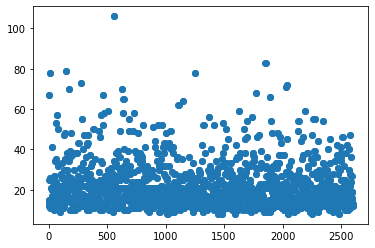

Episode =  1301  Epsilon =  0.7495677599074244
Episode =  1302  Epsilon =  0.7493129514629845
Episode =  1303  Epsilon =  0.7492305319835744
Episode =  1304  Epsilon =  0.7491406301634614
Episode =  1305  Epsilon =  0.749058229638257
Episode =  1306  Epsilon =  0.7489608588844925
Episode =  1307  Epsilon =  0.7488635007880399
Episode =  1308  Epsilon =  0.7487212309502997
Episode =  1309  Epsilon =  0.748623904003298
Episode =  1310  Epsilon =  0.7485415603145608
Episode =  1311  Epsilon =  0.7483843838768782
Episode =  1312  Epsilon =  0.7482945835879383
Episode =  1313  Epsilon =  0.7482047940743325
Episode =  1314  Epsilon =  0.7481299777098863
Episode =  1315  Epsilon =  0.7480327276204259
Episode =  1316  Epsilon =  0.7478008745732043
Episode =  1317  Epsilon =  0.7476887134151193
Episode =  1318  Epsilon =  0.7476139486559007
Episode =  1319  Epsilon =  0.7474719162093261
Episode =  1320  Epsilon =  0.7472327646581822
Episode =  1321  Epsilon =  0.7470310400543916
Episode =  1322

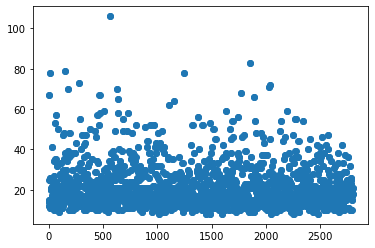

Episode =  1401  Epsilon =  0.7348650076767246
Episode =  1402  Epsilon =  0.7347694819126632
Episode =  1403  Epsilon =  0.7345711219241475
Episode =  1404  Epsilon =  0.7344609450702122
Episode =  1405  Epsilon =  0.7343581282493306
Episode =  1406  Epsilon =  0.7342406409354814
Episode =  1407  Epsilon =  0.7341745625817585
Episode =  1408  Epsilon =  0.7340057226938931
Episode =  1409  Epsilon =  0.7338369216345423
Episode =  1410  Epsilon =  0.7336021325618166
Episode =  1411  Epsilon =  0.7334700967217148
Episode =  1412  Epsilon =  0.7333894198517676
Episode =  1413  Epsilon =  0.7332794202389634
Episode =  1414  Epsilon =  0.7328322584266383
Episode =  1415  Epsilon =  0.7327443242714514
Episode =  1416  Epsilon =  0.7326124428221744
Episode =  1417  Epsilon =  0.7323487511285656
Episode =  1418  Epsilon =  0.7322755202812091
Episode =  1419  Epsilon =  0.732202296756535
Episode =  1420  Epsilon =  0.7320997961227027
Episode =  1421  Epsilon =  0.732041230774484
Episode =  1422

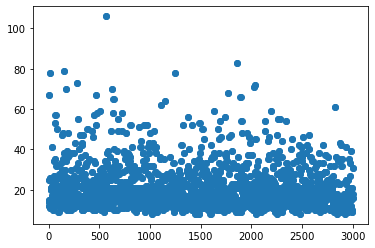

Episode =  1501  Epsilon =  0.7213373446220607
Episode =  1502  Epsilon =  0.7211858804413043
Episode =  1503  Epsilon =  0.7209623485852512
Episode =  1504  Epsilon =  0.7208470044139763
Episode =  1505  Epsilon =  0.7206956431933377
Episode =  1506  Epsilon =  0.7205082876201626
Episode =  1507  Epsilon =  0.7203714047342129
Episode =  1508  Epsilon =  0.7201769316823403
Episode =  1509  Epsilon =  0.7200977169728164
Episode =  1510  Epsilon =  0.7199825111308413
Episode =  1511  Epsilon =  0.7196370041813297
Episode =  1512  Epsilon =  0.7195434579191547
Episode =  1513  Epsilon =  0.7194283407510909
Episode =  1514  Epsilon =  0.7193132420002082
Episode =  1515  Epsilon =  0.7192125456987136
Episode =  1516  Epsilon =  0.7191406283996543
Episode =  1517  Epsilon =  0.7190615276766525
Episode =  1518  Epsilon =  0.7189464876108739
Episode =  1519  Epsilon =  0.7188386542646007
Episode =  1520  Epsilon =  0.718623036090752
Episode =  1521  Epsilon =  0.7185080661776637
Episode =  152

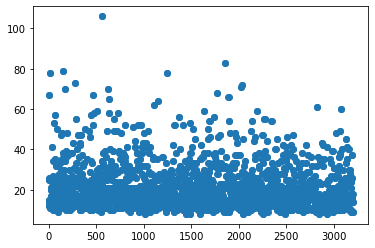

Episode =  1601  Epsilon =  0.7062766510285354
Episode =  1602  Epsilon =  0.7061707180057202
Episode =  1603  Epsilon =  0.7060859830274335
Episode =  1604  Epsilon =  0.7059730188723417
Episode =  1605  Epsilon =  0.7056906875464747
Episode =  1606  Epsilon =  0.7053097193507051
Episode =  1607  Epsilon =  0.7051898274889697
Episode =  1608  Epsilon =  0.7049219076021217
Episode =  1609  Epsilon =  0.7047386526465936
Episode =  1610  Epsilon =  0.7046329503050806
Episode =  1611  Epsilon =  0.7045343090902887
Episode =  1612  Epsilon =  0.7042736809182475
Episode =  1613  Epsilon =  0.7041821317482976
Episode =  1614  Epsilon =  0.7040624315592038
Episode =  1615  Epsilon =  0.7039779495588464
Episode =  1616  Epsilon =  0.7038723613136686
Episode =  1617  Epsilon =  0.703661232331847
Episode =  1618  Epsilon =  0.7033587245583105
Episode =  1619  Epsilon =  0.7031196244367817
Episode =  1620  Epsilon =  0.7029579263276448
Episode =  1621  Epsilon =  0.7028524910737121
Episode =  162

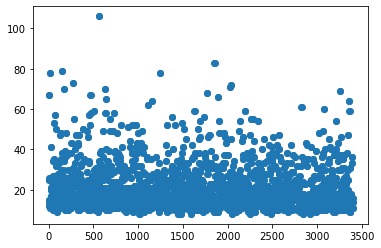

Episode =  1701  Epsilon =  0.691094882610082
Episode =  1702  Epsilon =  0.6910257769226904
Episode =  1703  Epsilon =  0.69093594985971
Episode =  1704  Epsilon =  0.6908530429347752
Episode =  1705  Epsilon =  0.6907701459580248
Episode =  1706  Epsilon =  0.6906803521247437
Episode =  1707  Epsilon =  0.6903627138133659
Episode =  1708  Epsilon =  0.6902384603292941
Episode =  1709  Epsilon =  0.6901556370976627
Episode =  1710  Epsilon =  0.6900866253296567
Episode =  1711  Epsilon =  0.6899762208542182
Episode =  1712  Epsilon =  0.68991412609912
Episode =  1713  Epsilon =  0.689748567404485
Episode =  1714  Epsilon =  0.6896726996142134
Episode =  1715  Epsilon =  0.6895485703208991
Episode =  1716  Epsilon =  0.6894451463094641
Episode =  1717  Epsilon =  0.68934173781039
Episode =  1718  Epsilon =  0.6892383448213499
Episode =  1719  Epsilon =  0.689162533152195
Episode =  1720  Epsilon =  0.6888938135115961
Episode =  1721  Epsilon =  0.6887904877058261
Episode =  1722  Epsil

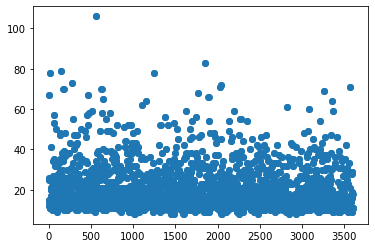

Episode =  1801  Epsilon =  0.6786443580820865
Episode =  1802  Epsilon =  0.678501858442371
Episode =  1803  Epsilon =  0.678379739709459
Episode =  1804  Epsilon =  0.6782915565162432
Episode =  1805  Epsilon =  0.6780881005864806
Episode =  1806  Epsilon =  0.677755920468864
Episode =  1807  Epsilon =  0.6776678183664729
Episode =  1808  Epsilon =  0.6775797277165536
Episode =  1809  Epsilon =  0.6774442259991403
Episode =  1810  Epsilon =  0.6772003911898502
Episode =  1811  Epsilon =  0.6770514242355868
Episode =  1812  Epsilon =  0.6769769530472662
Episode =  1813  Epsilon =  0.6768754146275716
Episode =  1814  Epsilon =  0.6768009627991463
Episode =  1815  Epsilon =  0.6766994507758769
Episode =  1816  Epsilon =  0.6765573595217719
Episode =  1817  Epsilon =  0.6763273702698654
Episode =  1818  Epsilon =  0.676097459200622
Episode =  1819  Epsilon =  0.6760095726831048
Episode =  1820  Epsilon =  0.6757459816712978
Episode =  1821  Epsilon =  0.6755095131444582
Episode =  1822  

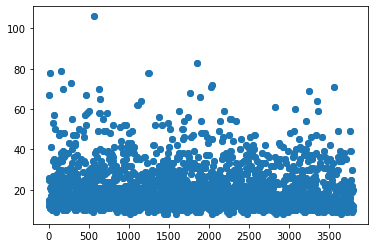

Episode =  1901  Epsilon =  0.666338172885704
Episode =  1902  Epsilon =  0.6662582175021525
Episode =  1903  Epsilon =  0.6661582867641721
Episode =  1904  Epsilon =  0.6660916745992193
Episode =  1905  Epsilon =  0.6657387413119255
Episode =  1906  Epsilon =  0.6654259191865729
Episode =  1907  Epsilon =  0.6653527267270827
Episode =  1908  Epsilon =  0.665286195113703
Episode =  1909  Epsilon =  0.6652130180229388
Episode =  1910  Epsilon =  0.665086640187676
Episode =  1911  Epsilon =  0.6648339565407524
Episode =  1912  Epsilon =  0.6647475341760879
Episode =  1913  Epsilon =  0.6646611230455447
Episode =  1914  Epsilon =  0.6645547863047055
Episode =  1915  Epsilon =  0.664475044913634
Episode =  1916  Epsilon =  0.6641893834942305
Episode =  1917  Epsilon =  0.6641229682087761
Episode =  1918  Epsilon =  0.6640366382661251
Episode =  1919  Epsilon =  0.6639237621967364
Episode =  1920  Epsilon =  0.6637578028317668
Episode =  1921  Epsilon =  0.663704704596988
Episode =  1922  E

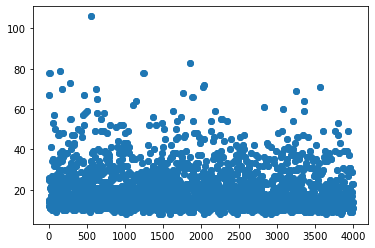

Episode =  2001  Epsilon =  0.6545103496676051
Episode =  2002  Epsilon =  0.6543860051359933
Episode =  2003  Epsilon =  0.6541962616573523
Episode =  2004  Epsilon =  0.6540588955531786
Episode =  2005  Epsilon =  0.6539150191425224
Episode =  2006  Epsilon =  0.6537384868029512
Episode =  2007  Epsilon =  0.6536404338743473
Episode =  2008  Epsilon =  0.6535162546102096
Episode =  2009  Epsilon =  0.6534509065789438
Episode =  2010  Epsilon =  0.653372497566833
Episode =  2011  Epsilon =  0.6531569212925561
Episode =  2012  Epsilon =  0.6528891831835756
Episode =  2013  Epsilon =  0.6527586190566055
Episode =  2014  Epsilon =  0.652699873718196
Episode =  2015  Epsilon =  0.652615028673884
Episode =  2016  Epsilon =  0.6524584206437553
Episode =  2017  Epsilon =  0.6523605597097153
Episode =  2018  Epsilon =  0.6523018501948559
Episode =  2019  Epsilon =  0.6520670649665854
Episode =  2020  Epsilon =  0.6519040693906152
Episode =  2021  Epsilon =  0.6517541494457073
Episode =  2022 

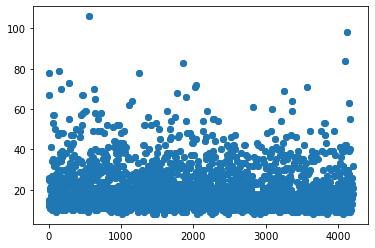

Episode =  2101  Epsilon =  0.64038368684505
Episode =  2102  Epsilon =  0.6402684287312483
Episode =  2103  Epsilon =  0.6401787978736855
Episode =  2104  Epsilon =  0.6401019814111016
Episode =  2105  Epsilon =  0.6399611751684751
Episode =  2106  Epsilon =  0.6398459930995506
Episode =  2107  Epsilon =  0.6397500238783019
Episode =  2108  Epsilon =  0.6396732588652533
Episode =  2109  Epsilon =  0.6395837113252226
Episode =  2110  Epsilon =  0.6394685971933358
Episode =  2111  Epsilon =  0.6394046538505527
Episode =  2112  Epsilon =  0.6392448234658704
Episode =  2113  Epsilon =  0.6390594702713407
Episode =  2114  Epsilon =  0.6389508399383846
Episode =  2115  Epsilon =  0.6387783473616074
Episode =  2116  Epsilon =  0.6386953119890421
Episode =  2117  Epsilon =  0.6386378322849863
Episode =  2118  Epsilon =  0.6384909632084951
Episode =  2119  Epsilon =  0.6383951972254708
Episode =  2120  Epsilon =  0.6383185947810534
Episode =  2121  Epsilon =  0.6382420015283319
Episode =  2122

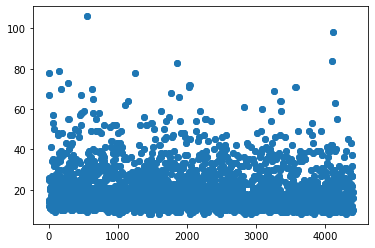

Episode =  2201  Epsilon =  0.6291360921485232
Episode =  2202  Epsilon =  0.6285764129190994
Episode =  2203  Epsilon =  0.6284821339996502
Episode =  2204  Epsilon =  0.6284318576913903
Episode =  2205  Epsilon =  0.6283690179618577
Episode =  2206  Epsilon =  0.6282810528968653
Episode =  2207  Epsilon =  0.6280737553918634
Episode =  2208  Epsilon =  0.6277786315619762
Episode =  2209  Epsilon =  0.6273644364355417
Episode =  2210  Epsilon =  0.6272891575963834
Episode =  2211  Epsilon =  0.6270445637467871
Episode =  2212  Epsilon =  0.6269818627390195
Episode =  2213  Epsilon =  0.6269191680010074
Episode =  2214  Epsilon =  0.6267373887104523
Episode =  2215  Epsilon =  0.6266496520564236
Episode =  2216  Epsilon =  0.6264554217426886
Episode =  2217  Epsilon =  0.6263802519782032
Episode =  2218  Epsilon =  0.6262863024565429
Episode =  2219  Epsilon =  0.6260546205468367
Episode =  2220  Epsilon =  0.6258167661754903
Episode =  2221  Epsilon =  0.625616537849694
Episode =  222

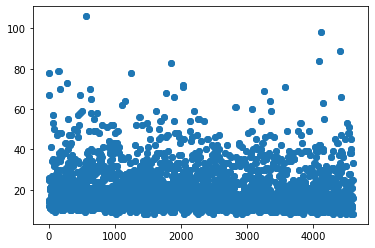

Episode =  2301  Epsilon =  0.6159388579378199
Episode =  2302  Epsilon =  0.6157171609652933
Episode =  2303  Epsilon =  0.61537861132919
Episode =  2304  Epsilon =  0.6153047706955591
Episode =  2305  Epsilon =  0.615114056732402
Episode =  2306  Epsilon =  0.6150279472228121
Episode =  2307  Epsilon =  0.6149234018811149
Episode =  2308  Epsilon =  0.6148496158690673
Episode =  2309  Epsilon =  0.6147758387107657
Episode =  2310  Epsilon =  0.6144193738914225
Episode =  2311  Epsilon =  0.6142535038832779
Episode =  2312  Epsilon =  0.6141613732283193
Episode =  2313  Epsilon =  0.6140324135259804
Episode =  2314  Epsilon =  0.6138236790359248
Episode =  2315  Epsilon =  0.6137316128495357
Episode =  2316  Epsilon =  0.6136272878648497
Episode =  2317  Epsilon =  0.6135659285108778
Episode =  2318  Epsilon =  0.6135045752925038
Episode =  2319  Epsilon =  0.6134248252803278
Episode =  2320  Epsilon =  0.6133021531962477
Episode =  2321  Epsilon =  0.6131181910657959
Episode =  2322 

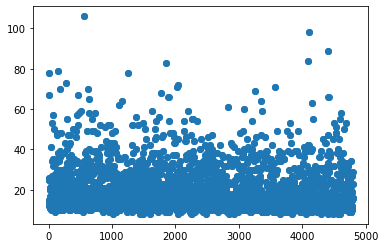

Episode =  2401  Epsilon =  0.6041834024971728
Episode =  2402  Epsilon =  0.6041229874797984
Episode =  2403  Epsilon =  0.6039840558650823
Episode =  2404  Epsilon =  0.6039176216050589
Episode =  2405  Epsilon =  0.6038391178096251
Episode =  2406  Epsilon =  0.603682140831769
Episode =  2407  Epsilon =  0.6036097036833697
Episode =  2408  Epsilon =  0.6035252046624174
Episode =  2409  Epsilon =  0.603428648837121
Episode =  2410  Epsilon =  0.6033683092909617
Episode =  2411  Epsilon =  0.6032536807753913
Episode =  2412  Epsilon =  0.6031752632862242
Episode =  2413  Epsilon =  0.6030244890718335
Episode =  2414  Epsilon =  0.6029340426343557
Episode =  2415  Epsilon =  0.6028496381988561
Episode =  2416  Epsilon =  0.6027411355720211
Episode =  2417  Epsilon =  0.6026386788003287
Episode =  2418  Epsilon =  0.6025723925229032
Episode =  2419  Epsilon =  0.6025061135365306
Episode =  2420  Epsilon =  0.6024338175022341
Episode =  2421  Epsilon =  0.6022711831413047
Episode =  2422

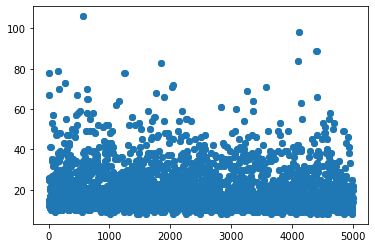

Episode =  2501  Epsilon =  0.5937794090841658
Episode =  2502  Epsilon =  0.5935834951863057
Episode =  2503  Epsilon =  0.5934054477364373
Episode =  2504  Epsilon =  0.5932630482296005
Episode =  2505  Epsilon =  0.5930969586601664
Episode =  2506  Epsilon =  0.5929427742666741
Episode =  2507  Epsilon =  0.5928775544747572
Episode =  2508  Epsilon =  0.5928064137924489
Episode =  2509  Epsilon =  0.5926997187742796
Episode =  2510  Epsilon =  0.592545637649216
Episode =  2511  Epsilon =  0.5923738251873685
Episode =  2512  Epsilon =  0.5921606100573996
Episode =  2513  Epsilon =  0.5920836345664837
Episode =  2514  Epsilon =  0.5920007490741905
Episode =  2515  Epsilon =  0.5918882801790927
Episode =  2516  Epsilon =  0.5917995040393221
Episode =  2517  Epsilon =  0.5917107412149072
Episode =  2518  Epsilon =  0.5916397405410894
Episode =  2519  Epsilon =  0.5915214250165037
Episode =  2520  Epsilon =  0.5914386182276445
Episode =  2521  Epsilon =  0.5912612141411377
Episode =  252

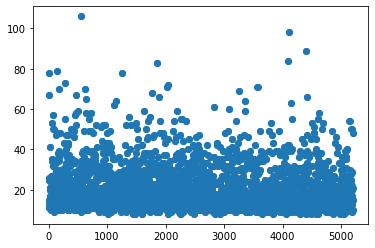

Episode =  2601  Epsilon =  0.5822547013652344
Episode =  2602  Epsilon =  0.5821731918203911
Episode =  2603  Epsilon =  0.5820742312844667
Episode =  2604  Epsilon =  0.581981107323195
Episode =  2605  Epsilon =  0.5816785573299481
Episode =  2606  Epsilon =  0.581608760439949
Episode =  2607  Epsilon =  0.5815447873147516
Episode =  2608  Epsilon =  0.5813877922024439
Episode =  2609  Epsilon =  0.5811843430980859
Episode =  2610  Epsilon =  0.5811204166559951
Episode =  2611  Epsilon =  0.5810564972453911
Episode =  2612  Epsilon =  0.5809867749977503
Episode =  2613  Epsilon =  0.5809170611162355
Episode =  2614  Epsilon =  0.5807950819515558
Episode =  2615  Epsilon =  0.5807370056376054
Episode =  2616  Epsilon =  0.580673128399683
Episode =  2617  Epsilon =  0.5805453950012892
Episode =  2618  Epsilon =  0.5804699293826375
Episode =  2619  Epsilon =  0.5804002775185653
Episode =  2620  Epsilon =  0.580226184421043
Episode =  2621  Epsilon =  0.5801391574556991
Episode =  2622  

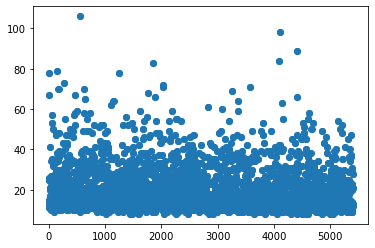

Episode =  2701  Epsilon =  0.5713534830271191
Episode =  2702  Epsilon =  0.5712449367202996
Episode =  2703  Epsilon =  0.5710678791205476
Episode =  2704  Epsilon =  0.5709308399601094
Episode =  2705  Epsilon =  0.5707082214590434
Episode =  2706  Epsilon =  0.5705427408980619
Episode =  2707  Epsilon =  0.570434348616844
Episode =  2708  Epsilon =  0.5702632448346258
Episode =  2709  Epsilon =  0.5702119237086807
Episode =  2710  Epsilon =  0.5701378013472673
Episode =  2711  Epsilon =  0.5700750899518651
Episode =  2712  Epsilon =  0.5700066853874486
Episode =  2713  Epsilon =  0.5699382890310465
Episode =  2714  Epsilon =  0.5698812983366781
Episode =  2715  Epsilon =  0.5697901250788642
Episode =  2716  Epsilon =  0.5695907344274366
Episode =  2717  Epsilon =  0.5695223879819054
Episode =  2718  Epsilon =  0.5693800258927209
Episode =  2719  Epsilon =  0.5693173978476177
Episode =  2720  Epsilon =  0.5691637036683153
Episode =  2721  Epsilon =  0.5690555733779712
Episode =  272

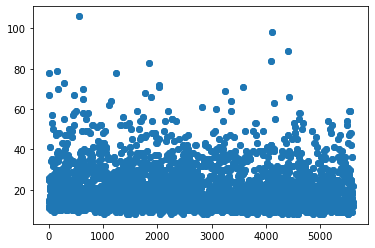

Episode =  2801  Epsilon =  0.5599391844352001
Episode =  2802  Epsilon =  0.5597992178354763
Episode =  2803  Epsilon =  0.5597096575734347
Episode =  2804  Epsilon =  0.5595921314736456
Episode =  2805  Epsilon =  0.5595361753381315
Episode =  2806  Epsilon =  0.5594634407268616
Episode =  2807  Epsilon =  0.5593963094775852
Episode =  2808  Epsilon =  0.5593179998676058
Episode =  2809  Epsilon =  0.5592564785789589
Episode =  2810  Epsilon =  0.559071955311655
Episode =  2811  Epsilon =  0.5588763153444843
Episode =  2812  Epsilon =  0.5588092545456745
Episode =  2813  Epsilon =  0.5587422017936373
Episode =  2814  Epsilon =  0.5586807438389781
Episode =  2815  Epsilon =  0.5585969484311908
Episode =  2816  Epsilon =  0.5584796559746199
Episode =  2817  Epsilon =  0.5583344708648722
Episode =  2818  Epsilon =  0.558250727393876
Episode =  2819  Epsilon =  0.5578935630189514
Episode =  2820  Epsilon =  0.5578266201427554
Episode =  2821  Epsilon =  0.5576927584872683
Episode =  2822

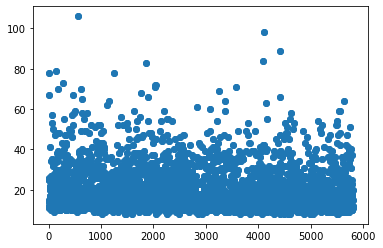

Episode =  2901  Epsilon =  0.5490822655772655
Episode =  2902  Epsilon =  0.5489669709843215
Episode =  2903  Epsilon =  0.5489065882405377
Episode =  2904  Epsilon =  0.5488297470813954
Episode =  2905  Epsilon =  0.5486760970324713
Episode =  2906  Epsilon =  0.5486322049198765
Episode =  2907  Epsilon =  0.5485444312280391
Episode =  2908  Epsilon =  0.5484402182077199
Episode =  2909  Epsilon =  0.54830312597587
Episode =  2910  Epsilon =  0.5482537811618057
Episode =  2911  Epsilon =  0.5481989587989643
Episode =  2912  Epsilon =  0.5479797241614652
Episode =  2913  Epsilon =  0.547782487951593
Episode =  2914  Epsilon =  0.547700327151417
Episode =  2915  Epsilon =  0.5476346073840215
Episode =  2916  Epsilon =  0.5475579442888439
Episode =  2917  Epsilon =  0.5473937023642849
Episode =  2918  Epsilon =  0.5472897079605874
Episode =  2919  Epsilon =  0.5471255464944553
Episode =  2920  Epsilon =  0.5469997227181677
Episode =  2921  Epsilon =  0.5466606896963394
Episode =  2922  

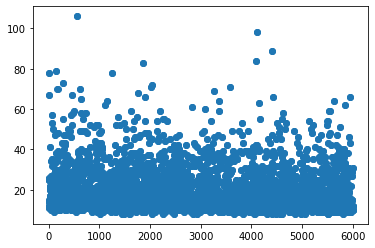

Episode =  3001  Epsilon =  0.539157840580876
Episode =  3002  Epsilon =  0.5389691692994263
Episode =  3003  Epsilon =  0.5388613867830883
Episode =  3004  Epsilon =  0.5388075036080286
Episode =  3005  Epsilon =  0.5387105274703728
Episode =  3006  Epsilon =  0.5385597103921405
Episode =  3007  Epsilon =  0.5384735481624499
Episode =  3008  Epsilon =  0.5384197037691194
Episode =  3009  Epsilon =  0.5383550976041442
Episode =  3010  Epsilon =  0.5382151441732668
Episode =  3011  Epsilon =  0.5380160424015278
Episode =  3012  Epsilon =  0.537924587905443
Episode =  3013  Epsilon =  0.5378492841110426
Episode =  3014  Epsilon =  0.5377955021406838
Episode =  3015  Epsilon =  0.5377309708750359
Episode =  3016  Epsilon =  0.5376610707419289
Episode =  3017  Epsilon =  0.5374567993704195
Episode =  3018  Epsilon =  0.5373009602755557
Episode =  3019  Epsilon =  0.5372311160399136
Episode =  3020  Epsilon =  0.5371720241627206
Episode =  3021  Epsilon =  0.5370646010376725
Episode =  3022

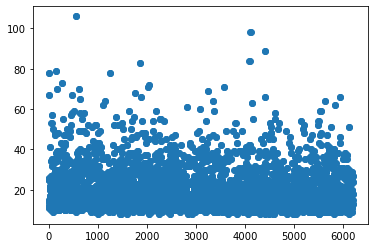

Episode =  3101  Epsilon =  0.5291957816132979
Episode =  3102  Epsilon =  0.5291216997601311
Episode =  3103  Epsilon =  0.5290634998652091
Episode =  3104  Epsilon =  0.5290000163717274
Episode =  3105  Epsilon =  0.528915383563076
Episode =  3106  Epsilon =  0.5288254760397625
Episode =  3107  Epsilon =  0.5287725964005819
Episode =  3108  Epsilon =  0.5287038607746394
Episode =  3109  Epsilon =  0.5286245615396096
Episode =  3110  Epsilon =  0.5285611307153034
Episode =  3111  Epsilon =  0.5284501450866788
Episode =  3112  Epsilon =  0.5284025869515592
Episode =  3113  Epsilon =  0.5283233329039875
Episode =  3114  Epsilon =  0.5282705034763588
Episode =  3115  Epsilon =  0.5280222759189047
Episode =  3116  Epsilon =  0.5278850086590169
Episode =  3117  Epsilon =  0.5277688873115337
Episode =  3118  Epsilon =  0.5274786956844789
Episode =  3119  Epsilon =  0.5273837585385395
Episode =  3120  Epsilon =  0.5273310230631799
Episode =  3121  Epsilon =  0.5272572022566311
Episode =  312

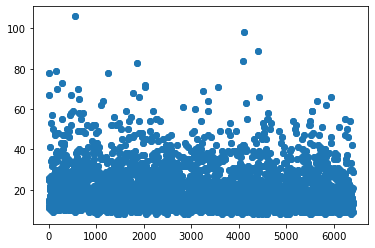

Episode =  3201  Epsilon =  0.5197087463084319
Episode =  3202  Epsilon =  0.5196255999766368
Episode =  3203  Epsilon =  0.5195528578484176
Episode =  3204  Epsilon =  0.5194957104629542
Episode =  3205  Epsilon =  0.5194385693633259
Episode =  3206  Epsilon =  0.5192360288319448
Episode =  3207  Epsilon =  0.5190854729680158
Episode =  3208  Epsilon =  0.5189868565900848
Episode =  3209  Epsilon =  0.5188778813378776
Episode =  3210  Epsilon =  0.5188259964034577
Episode =  3211  Epsilon =  0.5187481787295558
Episode =  3212  Epsilon =  0.5186496264311221
Episode =  3213  Epsilon =  0.518525166078918
Episode =  3214  Epsilon =  0.5184785011472482
Episode =  3215  Epsilon =  0.5183696326379418
Episode =  3216  Epsilon =  0.5182867005461234
Episode =  3217  Epsilon =  0.5181571457137879
Episode =  3218  Epsilon =  0.5180120827480638
Episode =  3219  Epsilon =  0.5179551048376927
Episode =  3220  Epsilon =  0.5178929542649731
Episode =  3221  Epsilon =  0.5178359894579488
Episode =  322

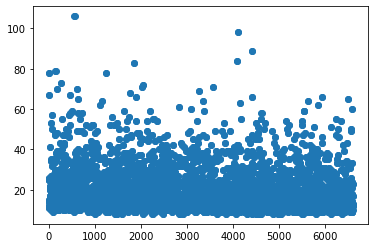

Episode =  3301  Epsilon =  0.5101825709461136
Episode =  3302  Epsilon =  0.5100754443905281
Episode =  3303  Epsilon =  0.5099275446976428
Episode =  3304  Epsilon =  0.509876554747662
Episode =  3305  Epsilon =  0.5098153735379436
Episode =  3306  Epsilon =  0.5097236154879677
Episode =  3307  Epsilon =  0.5096777426562457
Episode =  3308  Epsilon =  0.5096216814682805
Episode =  3309  Epsilon =  0.5095452443311734
Episode =  3310  Epsilon =  0.5094993875520529
Episode =  3311  Epsilon =  0.5093822167539263
Episode =  3312  Epsilon =  0.509321094860911
Episode =  3313  Epsilon =  0.5091683222133567
Episode =  3314  Epsilon =  0.5091072259860182
Episode =  3315  Epsilon =  0.5090206855464473
Episode =  3316  Epsilon =  0.5086950181607091
Episode =  3317  Epsilon =  0.5086441514566032
Episode =  3318  Epsilon =  0.5084966667764146
Episode =  3319  Epsilon =  0.5083746428299655
Episode =  3320  Epsilon =  0.5082933098005923
Episode =  3321  Epsilon =  0.5082475656899461
Episode =  3322

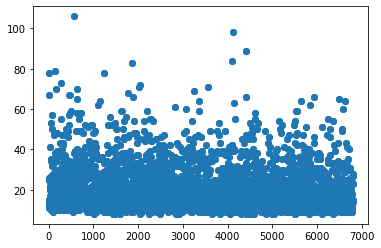

Episode =  3401  Epsilon =  0.5011766997198761
Episode =  3402  Epsilon =  0.5011315960721135
Episode =  3403  Epsilon =  0.5010764749038705
Episode =  3404  Epsilon =  0.5010213597985923
Episode =  3405  Epsilon =  0.5009712604181195
Episode =  3406  Epsilon =  0.5007558901609115
Episode =  3407  Epsilon =  0.5007008103178388
Episode =  3408  Epsilon =  0.5005706456801137
Episode =  3409  Epsilon =  0.5005005710454294
Episode =  3410  Epsilon =  0.5004455192857747
Episode =  3411  Epsilon =  0.5003904735814503
Episode =  3412  Epsilon =  0.5003204241689682
Episode =  3413  Epsilon =  0.5001953603218756
Episode =  3414  Epsilon =  0.5000403245671359
Episode =  3415  Epsilon =  0.49999032328479076
Episode =  3416  Epsilon =  0.4998853368657913
Episode =  3417  Epsilon =  0.49981036006354507
Episode =  3418  Epsilon =  0.4997553842225431
Episode =  3419  Epsilon =  0.4996154730029996
Episode =  3420  Epsilon =  0.49954053667709464
Episode =  3421  Epsilon =  0.49945062792206585
Episode =

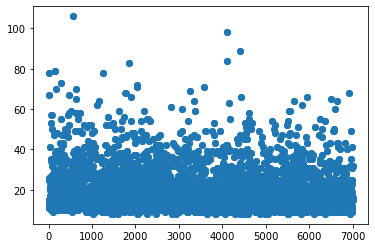

Episode =  3501  Epsilon =  0.49231995595220246
Episode =  3502  Epsilon =  0.4921378321740929
Episode =  3503  Epsilon =  0.49208862109752494
Episode =  3504  Epsilon =  0.4920000535598812
Episode =  3505  Epsilon =  0.49195577576897964
Episode =  3506  Epsilon =  0.49190658289705097
Episode =  3507  Epsilon =  0.49180821190975166
Episode =  3508  Epsilon =  0.4917639513837353
Episode =  3509  Epsilon =  0.4917049435451486
Episode =  3510  Epsilon =  0.491601696864517
Episode =  3511  Epsilon =  0.49155745492392533
Episode =  3512  Epsilon =  0.4915132169649094
Episode =  3513  Epsilon =  0.49143458153437325
Episode =  3514  Epsilon =  0.4913510451739848
Episode =  3515  Epsilon =  0.49130682579091745
Episode =  3516  Epsilon =  0.4912282233801623
Episode =  3517  Epsilon =  0.49113981069939594
Episode =  3518  Epsilon =  0.49103177236588447
Episode =  3519  Epsilon =  0.49098267188921435
Episode =  3520  Epsilon =  0.4909237577980734
Episode =  3521  Epsilon =  0.49086975942467176
Ep

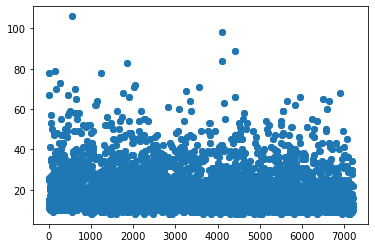

Episode =  3601  Epsilon =  0.48445710973002204
Episode =  3602  Epsilon =  0.48440866668345633
Episode =  3603  Epsilon =  0.48434569796468563
Episode =  3604  Epsilon =  0.4842924231344523
Episode =  3605  Epsilon =  0.4842294695262851
Episode =  3606  Epsilon =  0.4841616824846891
Episode =  3607  Epsilon =  0.4840503386594659
Episode =  3608  Epsilon =  0.48400677630713296
Episode =  3609  Epsilon =  0.48394385983045407
Episode =  3610  Epsilon =  0.4838857903418599
Episode =  3611  Epsilon =  0.48379386123488083
Episode =  3612  Epsilon =  0.4837309724352239
Episode =  3613  Epsilon =  0.48366325517798686
Episode =  3614  Epsilon =  0.48343115368482015
Episode =  3615  Epsilon =  0.48338281322821636
Episode =  3616  Epsilon =  0.4832813140027248
Episode =  3617  Epsilon =  0.48321365969294716
Episode =  3618  Epsilon =  0.483150846314211
Episode =  3619  Epsilon =  0.4830783794847451
Episode =  3620  Epsilon =  0.48303007430362116
Episode =  3621  Epsilon =  0.48298660377048913
Ep

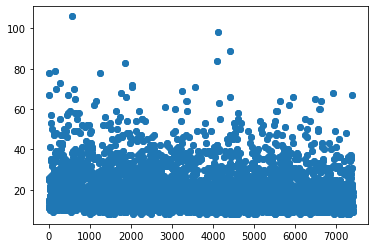

Episode =  3701  Epsilon =  0.4762624119328437
Episode =  3702  Epsilon =  0.47617669284223957
Episode =  3703  Epsilon =  0.4761147942051609
Episode =  3704  Epsilon =  0.47604814313291044
Episode =  3705  Epsilon =  0.4759815013911103
Episode =  3706  Epsilon =  0.47584348745876187
Episode =  3707  Epsilon =  0.47579114781557197
Episode =  3708  Epsilon =  0.4757388139293975
Episode =  3709  Epsilon =  0.47564843259315503
Episode =  3710  Epsilon =  0.4755818468066337
Episode =  3711  Epsilon =  0.47552478069438187
Episode =  3712  Epsilon =  0.4754629667999504
Episode =  3713  Epsilon =  0.4753821453697165
Episode =  3714  Epsilon =  0.4752918317937241
Episode =  3715  Epsilon =  0.4751777760116121
Episode =  3716  Epsilon =  0.47509700305944924
Episode =  3717  Epsilon =  0.47493074903579746
Episode =  3718  Epsilon =  0.4748642637174389
Episode =  3719  Epsilon =  0.474769300836113
Episode =  3720  Epsilon =  0.4746648636006308
Episode =  3721  Epsilon =  0.4746031614875967
Episod

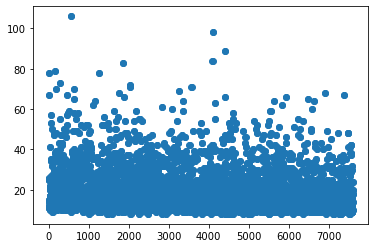

Episode =  3801  Epsilon =  0.4675513022783492
Episode =  3802  Epsilon =  0.4674998747208032
Episode =  3803  Epsilon =  0.4674344296468286
Episode =  3804  Epsilon =  0.46732693262812436
Episode =  3805  Epsilon =  0.46725216667416825
Episode =  3806  Epsilon =  0.4671867562767195
Episode =  3807  Epsilon =  0.46714471157091764
Episode =  3808  Epsilon =  0.4670979996689533
Episode =  3809  Epsilon =  0.4670279405738609
Episode =  3810  Epsilon =  0.46688785390617077
Episode =  3811  Epsilon =  0.4668411676885603
Episode =  3812  Epsilon =  0.46678515038962853
Episode =  3813  Epsilon =  0.4667384744418049
Episode =  3814  Epsilon =  0.46667780268723486
Episode =  3815  Epsilon =  0.46659847460049575
Episode =  3816  Epsilon =  0.4664958347400799
Episode =  3817  Epsilon =  0.4664212017504837
Episode =  3818  Epsilon =  0.4663605712384764
Episode =  3819  Epsilon =  0.4662812970762303
Episode =  3820  Epsilon =  0.4662346715109669
Episode =  3821  Epsilon =  0.4661554187497482
Episod

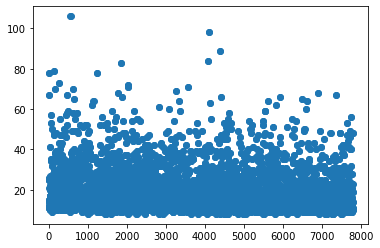

Episode =  3901  Epsilon =  0.45871503367920674
Episode =  3902  Epsilon =  0.4586508183907423
Episode =  3903  Epsilon =  0.45857744049707616
Episode =  3904  Epsilon =  0.4585086593836186
Episode =  3905  Epsilon =  0.4584582264571121
Episode =  3906  Epsilon =  0.4583802955725806
Episode =  3907  Epsilon =  0.4583207103052079
Episode =  3908  Epsilon =  0.4582519676981986
Episode =  3909  Epsilon =  0.4581786536152193
Episode =  3910  Epsilon =  0.4581328382697393
Episode =  3911  Epsilon =  0.45807328516956414
Episode =  3912  Epsilon =  0.4580183199481483
Episode =  3913  Epsilon =  0.457954202192291
Episode =  3914  Epsilon =  0.4579084092907188
Episode =  3915  Epsilon =  0.4578671995943947
Episode =  3916  Epsilon =  0.4578168372242315
Episode =  3917  Epsilon =  0.45776190277456896
Episode =  3918  Epsilon =  0.4577023978926329
Episode =  3919  Epsilon =  0.4576017149440404
Episode =  3920  Epsilon =  0.45753765550850956
Episode =  3921  Epsilon =  0.45749190425931485
Episode 

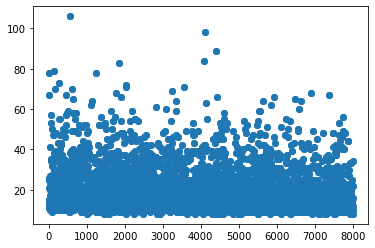

Episode =  4001  Epsilon =  0.451515297911449
Episode =  4002  Epsilon =  0.45147014886489245
Episode =  4003  Epsilon =  0.45141146185371256
Episode =  4004  Epsilon =  0.4513618095720949
Episode =  4005  Epsilon =  0.45131667587352803
Episode =  4006  Epsilon =  0.45125800881244055
Episode =  4007  Epsilon =  0.4512083734096447
Episode =  4008  Epsilon =  0.45114069756782643
Episode =  4009  Epsilon =  0.45107754260689104
Episode =  4010  Epsilon =  0.4509738072207933
Episode =  4011  Epsilon =  0.45091969388135783
Episode =  4012  Epsilon =  0.450843044432032
Episode =  4013  Epsilon =  0.45079345467257925
Episode =  4014  Epsilon =  0.45072584106359276
Episode =  4015  Epsilon =  0.4506266927810098
Episode =  4016  Epsilon =  0.45058613840640505
Episode =  4017  Epsilon =  0.45052306107792994
Episode =  4018  Epsilon =  0.45040143687956363
Episode =  4019  Epsilon =  0.4503338820685422
Episode =  4020  Epsilon =  0.4502753427617063
Episode =  4021  Epsilon =  0.4502213132325584
Epi

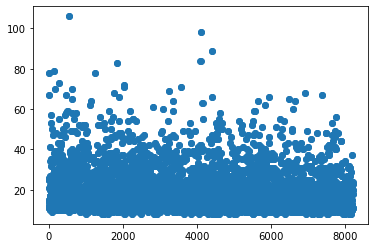

Episode =  4101  Epsilon =  0.4444596761205488
Episode =  4102  Epsilon =  0.44439301250234425
Episode =  4103  Epsilon =  0.4443441322038355
Episode =  4104  Epsilon =  0.44429525728183694
Episode =  4105  Epsilon =  0.4442375029412746
Episode =  4106  Epsilon =  0.4441930816341887
Episode =  4107  Epsilon =  0.44413089926653815
Episode =  4108  Epsilon =  0.44404208241274923
Episode =  4109  Epsilon =  0.44398880082622594
Episode =  4110  Epsilon =  0.44392220783366526
Episode =  4111  Epsilon =  0.4438378710481079
Episode =  4112  Epsilon =  0.4437047403230524
Episode =  4113  Epsilon =  0.4436603722892983
Episode =  4114  Epsilon =  0.4435139892528853
Episode =  4115  Epsilon =  0.4434607710334223
Episode =  4116  Epsilon =  0.44341199327532255
Episode =  4117  Epsilon =  0.4432834230837005
Episode =  4118  Epsilon =  0.4432302325303795
Episode =  4119  Epsilon =  0.4431814801299937
Episode =  4120  Epsilon =  0.4430662684993772
Episode =  4121  Epsilon =  0.4430131040029125
Episod

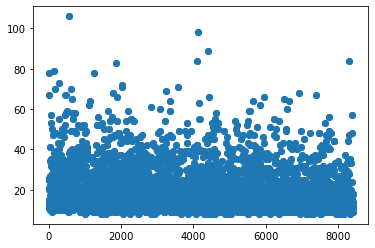

Episode =  4201  Epsilon =  0.43684542756085076
Episode =  4202  Epsilon =  0.4367799059885643
Episode =  4203  Epsilon =  0.43672312857528384
Episode =  4204  Epsilon =  0.43667945866430713
Episode =  4205  Epsilon =  0.4366357931200815
Episode =  4206  Epsilon =  0.43657903444016255
Episode =  4207  Epsilon =  0.4364000746201086
Episode =  4208  Epsilon =  0.43630407764373014
Episode =  4209  Epsilon =  0.43625608707467106
Episode =  4210  Epsilon =  0.436208101784258
Episode =  4211  Epsilon =  0.4361688450179616
Episode =  4212  Epsilon =  0.43612959178459754
Episode =  4213  Epsilon =  0.4360903420838479
Episode =  4214  Epsilon =  0.43604673544804023
Episode =  4215  Epsilon =  0.43595953525726006
Episode =  4216  Epsilon =  0.4359115825855897
Episode =  4217  Epsilon =  0.4358462010788441
Episode =  4218  Epsilon =  0.43577211389268483
Episode =  4219  Epsilon =  0.4356414025197581
Episode =  4220  Epsilon =  0.4355412170198785
Episode =  4221  Epsilon =  0.43547153634816
Episod

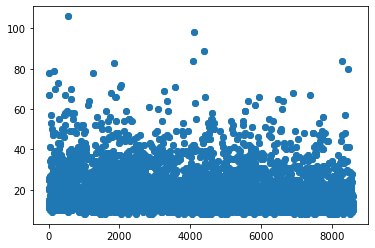

Episode =  4301  Epsilon =  0.42991155429651473
Episode =  4302  Epsilon =  0.42985137119274336
Episode =  4303  Epsilon =  0.4297310302590292
Episode =  4304  Epsilon =  0.42968376268180236
Episode =  4305  Epsilon =  0.42964079666870003
Episode =  4306  Epsilon =  0.4295935390165725
Episode =  4307  Epsilon =  0.4295419911425634
Episode =  4308  Epsilon =  0.4294517972460821
Episode =  4309  Epsilon =  0.4294088544282476
Episode =  4310  Epsilon =  0.4293272749041029
Episode =  4311  Epsilon =  0.429267173593312
Episode =  4312  Epsilon =  0.4291770374021685
Episode =  4313  Epsilon =  0.42910837491264125
Episode =  4314  Epsilon =  0.4290568852545405
Episode =  4315  Epsilon =  0.42899253187014275
Episode =  4316  Epsilon =  0.4289024533474172
Episode =  4317  Epsilon =  0.4288552769081822
Episode =  4318  Epsilon =  0.4287909537626173
Episode =  4319  Epsilon =  0.42875236450626697
Episode =  4320  Epsilon =  0.42870520457581396
Episode =  4321  Epsilon =  0.42867090970273497
Episo

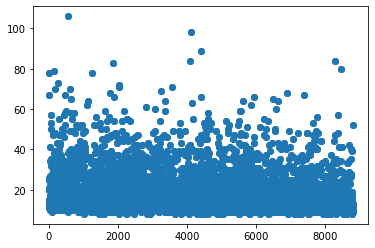

Episode =  4401  Epsilon =  0.42306658588501367
Episode =  4402  Epsilon =  0.42303274208113156
Episode =  4403  Epsilon =  0.42298198145158294
Episode =  4404  Epsilon =  0.42293122691291385
Episode =  4405  Epsilon =  0.42288893611625095
Episode =  4406  Epsilon =  0.4228297361052914
Episode =  4407  Epsilon =  0.4227155880579613
Episode =  4408  Epsilon =  0.4225803413866356
Episode =  4409  Epsilon =  0.42250005915023614
Episode =  4410  Epsilon =  0.4224451379871045
Episode =  4411  Epsilon =  0.422394447865464
Episode =  4412  Epsilon =  0.42231842408731124
Episode =  4413  Epsilon =  0.422263526535085
Episode =  4414  Epsilon =  0.4222128582054023
Episode =  4415  Epsilon =  0.42209465574523186
Episode =  4416  Epsilon =  0.42200180559910777
Episode =  4417  Epsilon =  0.4219638273355421
Episode =  4418  Epsilon =  0.42187522467841826
Episode =  4419  Epsilon =  0.4217065091774716
Episode =  4420  Epsilon =  0.4216559076855273
Episode =  4421  Epsilon =  0.42161374441377314
Epis

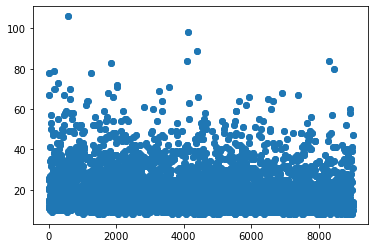

Episode =  4501  Epsilon =  0.41565669553949425
Episode =  4502  Epsilon =  0.4156151321559604
Episode =  4503  Epsilon =  0.41558188444155225
Episode =  4504  Epsilon =  0.41552786257818053
Episode =  4505  Epsilon =  0.41548215725566173
Episode =  4506  Epsilon =  0.41544476573110956
Episode =  4507  Epsilon =  0.41534091804041584
Episode =  4508  Epsilon =  0.4152827746727369
Episode =  4509  Epsilon =  0.41522463944451893
Episode =  4510  Epsilon =  0.41515820914892365
Episode =  4511  Epsilon =  0.4151083934019084
Episode =  4512  Epsilon =  0.41506273421823064
Episode =  4513  Epsilon =  0.4150212302275623
Episode =  4514  Epsilon =  0.41497973038706476
Episode =  4515  Epsilon =  0.4149257867982408
Episode =  4516  Epsilon =  0.41487599894009475
Episode =  4517  Epsilon =  0.4148096244222389
Episode =  4518  Epsilon =  0.4147225239824774
Episode =  4519  Epsilon =  0.4146561740185277
Episode =  4520  Epsilon =  0.4146064185118124
Episode =  4521  Epsilon =  0.4144488987910166
Ep

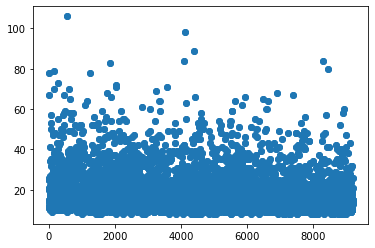

Episode =  4601  Epsilon =  0.4091286881865074
Episode =  4602  Epsilon =  0.40908777756780623
Episode =  4603  Epsilon =  0.408920086796412
Episode =  4604  Epsilon =  0.40886284227769204
Episode =  4605  Epsilon =  0.4088015177574262
Episode =  4606  Epsilon =  0.4087606398539686
Episode =  4607  Epsilon =  0.4086462034688311
Episode =  4608  Epsilon =  0.40851954341237734
Episode =  4609  Epsilon =  0.40848277849174053
Episode =  4610  Epsilon =  0.40843376374433815
Episode =  4611  Epsilon =  0.4083806710716124
Episode =  4612  Epsilon =  0.4083153357178845
Episode =  4613  Epsilon =  0.4082500108169245
Episode =  4614  Epsilon =  0.4082091880611279
Episode =  4615  Epsilon =  0.40816836938738227
Episode =  4616  Epsilon =  0.4081153112135081
Episode =  4617  Epsilon =  0.40798065605340494
Episode =  4618  Epsilon =  0.40791538469664
Episode =  4619  Epsilon =  0.40784604532195123
Episode =  4620  Epsilon =  0.4077930290472724
Episode =  4621  Epsilon =  0.4077522519871393
Episode 

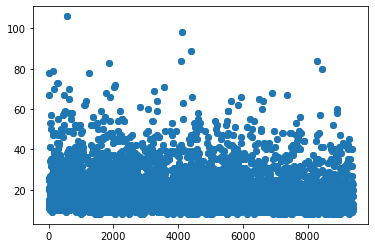

Episode =  4701  Epsilon =  0.40241336455379473
Episode =  4702  Epsilon =  0.4023449604383547
Episode =  4703  Epsilon =  0.40230875120240095
Episode =  4704  Epsilon =  0.40225243220124884
Episode =  4705  Epsilon =  0.4021800336415103
Episode =  4706  Epsilon =  0.4021237326594652
Episode =  4707  Epsilon =  0.4020875433330161
Episode =  4708  Epsilon =  0.4020553777770162
Episode =  4709  Epsilon =  0.4019629161359305
Episode =  4710  Epsilon =  0.4019066455480566
Episode =  4711  Epsilon =  0.4018423459503709
Episode =  4712  Epsilon =  0.4018061819474594
Episode =  4713  Epsilon =  0.40172984640667186
Episode =  4714  Epsilon =  0.4016695917501955
Episode =  4715  Epsilon =  0.40162942700011467
Episode =  4716  Epsilon =  0.4015611561420653
Episode =  4717  Epsilon =  0.4015049417963724
Episode =  4718  Epsilon =  0.4014286634854906
Episode =  4719  Epsilon =  0.40133233264806967
Episode =  4720  Epsilon =  0.4012881887401567
Episode =  4721  Epsilon =  0.4012400372874094
Episode

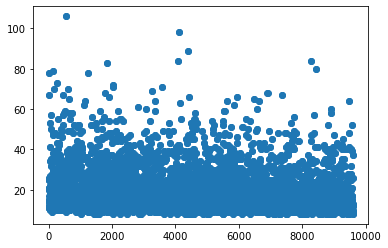

Episode =  4801  Epsilon =  0.39590722830252095
Episode =  4802  Epsilon =  0.39583993013070606
Episode =  4803  Epsilon =  0.3958003483147252
Episode =  4804  Epsilon =  0.3957449404216428
Episode =  4805  Epsilon =  0.3956895402850835
Episode =  4806  Epsilon =  0.3955945866650721
Episode =  4807  Epsilon =  0.39553920757646016
Episode =  4808  Epsilon =  0.3954324269403507
Episode =  4809  Epsilon =  0.39538893198312786
Episode =  4810  Epsilon =  0.3953454418100633
Episode =  4811  Epsilon =  0.395305909440195
Episode =  4812  Epsilon =  0.3952703336871566
Episode =  4813  Epsilon =  0.3951675772730911
Episode =  4814  Epsilon =  0.39513201396932524
Episode =  4815  Epsilon =  0.39510040483063535
Episode =  4816  Epsilon =  0.39502139304616873
Episode =  4817  Epsilon =  0.39496214457719964
Episode =  4818  Epsilon =  0.394879211649764
Episode =  4819  Epsilon =  0.39483972590034755
Episode =  4820  Epsilon =  0.39479629613632744
Episode =  4821  Epsilon =  0.39475287114929486
Epis

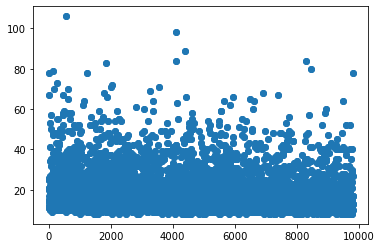

Episode =  4901  Epsilon =  0.38942449459749723
Episode =  4902  Epsilon =  0.38937776669551455
Episode =  4903  Epsilon =  0.38933104440051564
Episode =  4904  Epsilon =  0.38921037108544654
Episode =  4905  Epsilon =  0.389175343903431
Episode =  4906  Epsilon =  0.38914031987370434
Episode =  4907  Epsilon =  0.38903915704808695
Episode =  4908  Epsilon =  0.38898469565079313
Episode =  4909  Epsilon =  0.38888357328201195
Episode =  4910  Epsilon =  0.38883691028636813
Episode =  4911  Epsilon =  0.388766926291184
Episode =  4912  Epsilon =  0.38870472886989005
Episode =  4913  Epsilon =  0.3886347686651007
Episode =  4914  Epsilon =  0.38859590732563964
Episode =  4915  Epsilon =  0.38854150797865317
Episode =  4916  Epsilon =  0.38850654099130755
Episode =  4917  Epsilon =  0.3884638078358303
Episode =  4918  Epsilon =  0.388405542925956
Episode =  4919  Epsilon =  0.3883705881748533
Episode =  4920  Epsilon =  0.3882890393220088
Episode =  4921  Epsilon =  0.38821915393423034
Ep

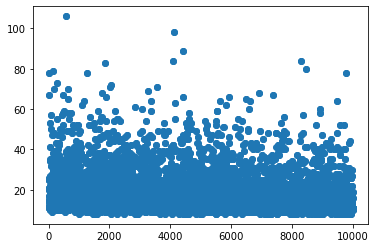

Episode =  5001  Epsilon =  0.38351167778600737
Episode =  5002  Epsilon =  0.3834733287274584
Episode =  5003  Epsilon =  0.38337363912064615
Episode =  5004  Epsilon =  0.38333913721824314
Episode =  5005  Epsilon =  0.38330847146724045
Episode =  5006  Epsilon =  0.38326631006510514
Episode =  5007  Epsilon =  0.3832279855419788
Episode =  5008  Epsilon =  0.3830938798874239
Episode =  5009  Epsilon =  0.383055572606367
Episode =  5010  Epsilon =  0.3830134390214373
Episode =  5011  Epsilon =  0.3829789695354224
Episode =  5012  Epsilon =  0.3829330150461744
Episode =  5013  Epsilon =  0.3828870660711067
Episode =  5014  Epsilon =  0.38282963760558003
Episode =  5015  Epsilon =  0.382791356747298
Episode =  5016  Epsilon =  0.382737769976448
Episode =  5017  Epsilon =  0.3826956713477101
Episode =  5018  Epsilon =  0.38263444524464296
Episode =  5019  Epsilon =  0.3825885320956227
Episode =  5020  Epsilon =  0.3825426244558222
Episode =  5021  Epsilon =  0.38246994862497624
Episode 

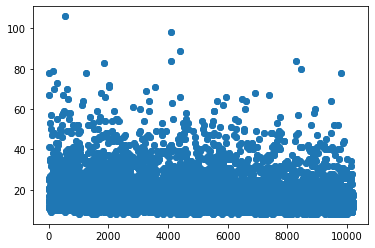

Episode =  5101  Epsilon =  0.37787374993250605
Episode =  5102  Epsilon =  0.3778321863138719
Episode =  5103  Epsilon =  0.37778684939846746
Episode =  5104  Epsilon =  0.3777415179231393
Episode =  5105  Epsilon =  0.37769619188723463
Episode =  5106  Epsilon =  0.37765087129010066
Episode =  5107  Epsilon =  0.3776055561310849
Episode =  5108  Epsilon =  0.3775602464095347
Episode =  5109  Epsilon =  0.37752249246139186
Episode =  5110  Epsilon =  0.37746586861753545
Episode =  5111  Epsilon =  0.3773941572738472
Episode =  5112  Epsilon =  0.3773337793409356
Episode =  5113  Epsilon =  0.3772771838017828
Episode =  5114  Epsilon =  0.3772092803597079
Episode =  5115  Epsilon =  0.37716024658569364
Episode =  5116  Epsilon =  0.3771225326353333
Episode =  5117  Epsilon =  0.3770772808728351
Episode =  5118  Epsilon =  0.3769905635046996
Episode =  5119  Epsilon =  0.37694909703074375
Episode =  5120  Epsilon =  0.37688502145120395
Episode =  5121  Epsilon =  0.3768397981881955
Epis

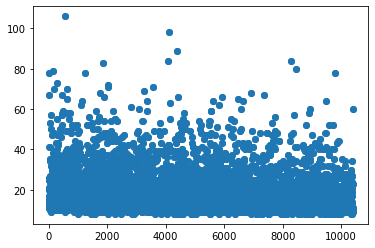

Episode =  5201  Epsilon =  0.3723261505310054
Episode =  5202  Epsilon =  0.37224797063946813
Episode =  5203  Epsilon =  0.3721772505972625
Episode =  5204  Epsilon =  0.3721102650559612
Episode =  5205  Epsilon =  0.3720209697546876
Episode =  5206  Epsilon =  0.3719874895414425
Episode =  5207  Epsilon =  0.3719502928383374
Episode =  5208  Epsilon =  0.37187962934925867
Episode =  5209  Epsilon =  0.3718350066942621
Episode =  5210  Epsilon =  0.371771800431839
Episode =  5211  Epsilon =  0.37172719071547156
Episode =  5212  Epsilon =  0.37166771942014304
Episode =  5213  Epsilon =  0.37160454159399703
Episode =  5214  Epsilon =  0.3715710988574124
Episode =  5215  Epsilon =  0.37153394379108573
Episode =  5216  Epsilon =  0.37147450341263727
Episode =  5217  Epsilon =  0.3713853606750869
Episode =  5218  Epsilon =  0.3713445107364495
Episode =  5219  Epsilon =  0.3713110914014721
Episode =  5220  Epsilon =  0.3712071393696021
Episode =  5221  Epsilon =  0.37117744413475345
Episod

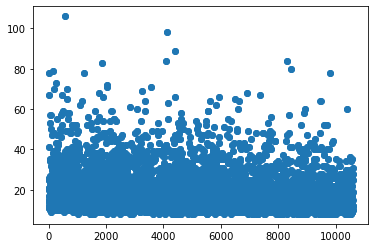

Episode =  5301  Epsilon =  0.3666986138637295
Episode =  5302  Epsilon =  0.36666561263856484
Episode =  5303  Epsilon =  0.36659228721544995
Episode =  5304  Epsilon =  0.3664933211537501
Episode =  5305  Epsilon =  0.36636140796349764
Episode =  5306  Epsilon =  0.36631012121297213
Episode =  5307  Epsilon =  0.3662734922154756
Episode =  5308  Epsilon =  0.3662405292493463
Episode =  5309  Epsilon =  0.36618559756459595
Episode =  5310  Epsilon =  0.36614898101877946
Episode =  5311  Epsilon =  0.36609406306516495
Episode =  5312  Epsilon =  0.3660354929936548
Episode =  5313  Epsilon =  0.36599523150515484
Episode =  5314  Epsilon =  0.36593301791517097
Episode =  5315  Epsilon =  0.3658817911347542
Episode =  5316  Epsilon =  0.3658378881735625
Episode =  5317  Epsilon =  0.3657793590865511
Episode =  5318  Epsilon =  0.36574278316234815
Episode =  5319  Epsilon =  0.36569889688102897
Episode =  5320  Epsilon =  0.36560382800267277
Episode =  5321  Epsilon =  0.36554899181546946


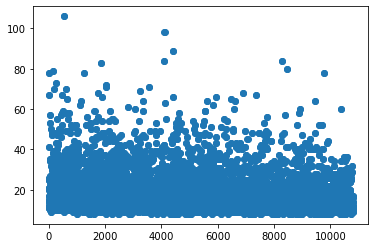

Episode =  5401  Epsilon =  0.36140180325801663
Episode =  5402  Epsilon =  0.3613548243121848
Episode =  5403  Epsilon =  0.36129339952043005
Episode =  5404  Epsilon =  0.3611814164847597
Episode =  5405  Epsilon =  0.36113807753186483
Episode =  5406  Epsilon =  0.36110196571029146
Episode =  5407  Epsilon =  0.36106585749970155
Episode =  5408  Epsilon =  0.36093950719391965
Episode =  5409  Epsilon =  0.36085289253943936
Episode =  5410  Epsilon =  0.36080959300685567
Episode =  5411  Epsilon =  0.36076990633286465
Episode =  5412  Epsilon =  0.36069775992721015
Episode =  5413  Epsilon =  0.36065447900932984
Episode =  5414  Epsilon =  0.3606220217291044
Episode =  5415  Epsilon =  0.3605643271097927
Episode =  5416  Epsilon =  0.3604994316961514
Episode =  5417  Epsilon =  0.36045977913785776
Episode =  5418  Epsilon =  0.3604273393797447
Episode =  5419  Epsilon =  0.3603840909102208
Episode =  5420  Epsilon =  0.36034805448316265
Episode =  5421  Epsilon =  0.36027959519894426

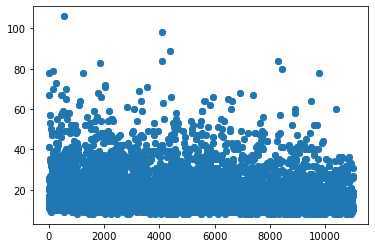

Episode =  5501  Epsilon =  0.35613520254793846
Episode =  5502  Epsilon =  0.35604618032065327
Episode =  5503  Epsilon =  0.35600701759062076
Episode =  5504  Epsilon =  0.35597141884682176
Episode =  5505  Epsilon =  0.355932264340058
Episode =  5506  Epsilon =  0.35587176130053855
Episode =  5507  Epsilon =  0.3558255012098402
Episode =  5508  Epsilon =  0.3557828049250041
Episode =  5509  Epsilon =  0.35571521295146813
Episode =  5510  Epsilon =  0.3555978468844889
Episode =  5511  Epsilon =  0.35555162240017224
Episode =  5512  Epsilon =  0.3555196243540797
Episode =  5513  Epsilon =  0.35548407434692375
Episode =  5514  Epsilon =  0.3554485278945731
Episode =  5515  Epsilon =  0.3554129849966721
Episode =  5516  Epsilon =  0.3553738919139463
Episode =  5517  Epsilon =  0.35532769654173796
Episode =  5518  Epsilon =  0.3552921657263077
Episode =  5519  Epsilon =  0.3552246669648979
Episode =  5520  Epsilon =  0.35518559459591265
Episode =  5521  Epsilon =  0.35515362949067536
Epi

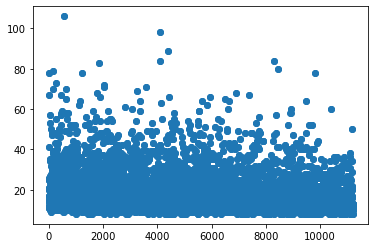

Episode =  5601  Epsilon =  0.3509909760725574
Episode =  5602  Epsilon =  0.3509628980579968
Episode =  5603  Epsilon =  0.3508962217751937
Episode =  5604  Epsilon =  0.3507278328472596
Episode =  5605  Epsilon =  0.3506927619929006
Episode =  5606  Epsilon =  0.35060159418294895
Episode =  5607  Epsilon =  0.3505595247262115
Episode =  5608  Epsilon =  0.3504718962371886
Episode =  5609  Epsilon =  0.35044035534359275
Episode =  5610  Epsilon =  0.35039480128624556
Episode =  5611  Epsilon =  0.3503527566430429
Episode =  5612  Epsilon =  0.35024066225744555
Episode =  5613  Epsilon =  0.3502126442652891
Episode =  5614  Epsilon =  0.35012860373613364
Episode =  5615  Epsilon =  0.3500235814342556
Episode =  5616  Epsilon =  0.34997108209708505
Episode =  5617  Epsilon =  0.349936086913639
Episode =  5618  Epsilon =  0.3498905984065991
Episode =  5619  Epsilon =  0.34985561127107945
Episode =  5620  Epsilon =  0.34978914535172884
Episode =  5621  Epsilon =  0.34974367594575484
Episo

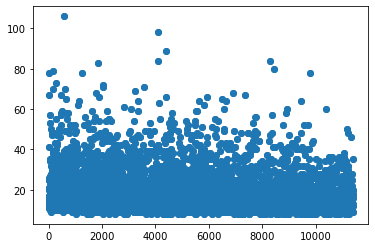

Episode =  5701  Epsilon =  0.3457619695345115
Episode =  5702  Epsilon =  0.3457273952391727
Episode =  5703  Epsilon =  0.3456340619096898
Episode =  5704  Epsilon =  0.34549929158131704
Episode =  5705  Epsilon =  0.3454647435523287
Episode =  5706  Epsilon =  0.345437107616476
Episode =  5707  Epsilon =  0.34540601983120023
Episode =  5708  Epsilon =  0.34534730609220593
Episode =  5709  Epsilon =  0.34529896109530606
Episode =  5710  Epsilon =  0.34526098048845977
Episode =  5711  Epsilon =  0.3452264562892701
Episode =  5712  Epsilon =  0.34516432143011655
Episode =  5713  Epsilon =  0.34507459082068104
Episode =  5714  Epsilon =  0.34504008525943314
Episode =  5715  Epsilon =  0.34498143372371753
Episode =  5716  Epsilon =  0.3448951995761737
Episode =  5717  Epsilon =  0.34486760920178877
Episode =  5718  Epsilon =  0.34479174705221644
Episode =  5719  Epsilon =  0.3447159015903978
Episode =  5720  Epsilon =  0.3446641983415153
Episode =  5721  Epsilon =  0.34457804349250776
Ep

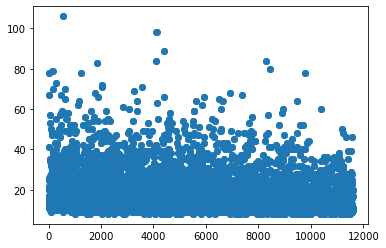

Episode =  5801  Epsilon =  0.3405495597549018
Episode =  5802  Epsilon =  0.34049848140730143
Episode =  5803  Epsilon =  0.3403861360081729
Episode =  5804  Epsilon =  0.34029084170838514
Episode =  5805  Epsilon =  0.3401207396670927
Episode =  5806  Epsilon =  0.34007992783115026
Episode =  5807  Epsilon =  0.3400289199227032
Episode =  5808  Epsilon =  0.33998471925722135
Episode =  5809  Epsilon =  0.33995072265513665
Episode =  5810  Epsilon =  0.33991333031922194
Episode =  5811  Epsilon =  0.33985894880891443
Episode =  5812  Epsilon =  0.3397128416067601
Episode =  5813  Epsilon =  0.3396788721909451
Episode =  5814  Epsilon =  0.33959735945110175
Episode =  5815  Epsilon =  0.3395566104167031
Episode =  5816  Epsilon =  0.33951926143053357
Episode =  5817  Epsilon =  0.33948531137167154
Episode =  5818  Epsilon =  0.3394377869924847
Episode =  5819  Epsilon =  0.3394072391190693
Episode =  5820  Epsilon =  0.33936651289762765
Episode =  5821  Epsilon =  0.339325791563015
Epi

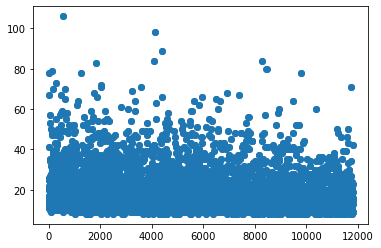

Episode =  5901  Epsilon =  0.33516426155078294
Episode =  5902  Epsilon =  0.3350938847975577
Episode =  5903  Epsilon =  0.33501347231715106
Episode =  5904  Epsilon =  0.33493307913332765
Episode =  5905  Epsilon =  0.33489623870508534
Episode =  5906  Epsilon =  0.3348627509230702
Episode =  5907  Epsilon =  0.33483261478231413
Episode =  5908  Epsilon =  0.3347991333623414
Episode =  5909  Epsilon =  0.33475896007764905
Episode =  5910  Epsilon =  0.3346987091888312
Episode =  5911  Epsilon =  0.3345748941926914
Episode =  5912  Epsilon =  0.3344544695106469
Episode =  5913  Epsilon =  0.3344210259031216
Episode =  5914  Epsilon =  0.3343909295156296
Episode =  5915  Epsilon =  0.3343608358366768
Episode =  5916  Epsilon =  0.3343274015920039
Episode =  5917  Epsilon =  0.33428059926603126
Episode =  5918  Epsilon =  0.33424383060626817
Episode =  5919  Epsilon =  0.3342137501655554
Episode =  5920  Epsilon =  0.334183672431947
Episode =  5921  Epsilon =  0.3341435729977659
Episod

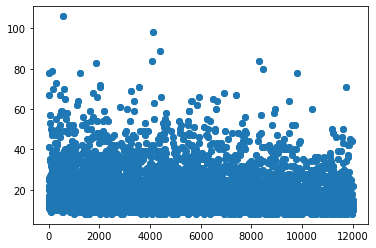

Episode =  6001  Epsilon =  0.33020735946467555
Episode =  6002  Epsilon =  0.3301677371570367
Episode =  6003  Epsilon =  0.33009840955852315
Episode =  6004  Epsilon =  0.33005549976902576
Episode =  6005  Epsilon =  0.3300257962592416
Episode =  6006  Epsilon =  0.32998289590881213
Episode =  6007  Epsilon =  0.32992350462987946
Episode =  6008  Epsilon =  0.3298872152217708
Episode =  6009  Epsilon =  0.32985752685683867
Episode =  6010  Epsilon =  0.32982784116372577
Episode =  6011  Epsilon =  0.3297915622779669
Episode =  6012  Epsilon =  0.32971571932013116
Episode =  6013  Epsilon =  0.32968604638905846
Episode =  6014  Epsilon =  0.32965307959762014
Episode =  6015  Epsilon =  0.3296234123038407
Episode =  6016  Epsilon =  0.32958386006530654
Episode =  6017  Epsilon =  0.3295541990009735
Episode =  6018  Epsilon =  0.32952124539354877
Episode =  6019  Epsilon =  0.3294882950813036
Episode =  6020  Epsilon =  0.32945205354337304
Episode =  6021  Epsilon =  0.3294158159917724


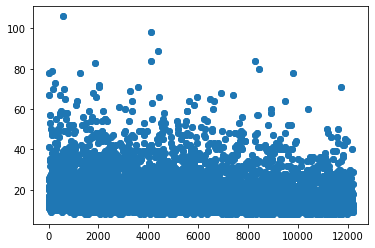

Episode =  6101  Epsilon =  0.3255938968020908
Episode =  6102  Epsilon =  0.32554180620641354
Episode =  6103  Epsilon =  0.32549948873388873
Episode =  6104  Epsilon =  0.32546043133401803
Episode =  6105  Epsilon =  0.32542137862073056
Episode =  6106  Epsilon =  0.32539209216099696
Episode =  6107  Epsilon =  0.3253595547413656
Episode =  6108  Epsilon =  0.3253270205752972
Episode =  6109  Epsilon =  0.32529123675009897
Episode =  6110  Epsilon =  0.3252456993923296
Episode =  6111  Epsilon =  0.3251839088886805
Episode =  6112  Epsilon =  0.3251546438001542
Episode =  6113  Epsilon =  0.3251156277789859
Episode =  6114  Epsilon =  0.32503435943734754
Episode =  6115  Epsilon =  0.32499860780294304
Episode =  6116  Epsilon =  0.32496935939068067
Episode =  6117  Epsilon =  0.32494011361064384
Episode =  6118  Epsilon =  0.32491087046259554
Episode =  6119  Epsilon =  0.3248718836923263
Episode =  6120  Epsilon =  0.32482965330363234
Episode =  6121  Epsilon =  0.3247744372321493
E

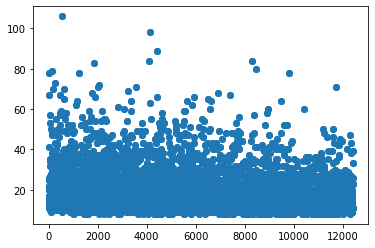

Episode =  6201  Epsilon =  0.3207785353467415
Episode =  6202  Epsilon =  0.3206117747036869
Episode =  6203  Epsilon =  0.32057330379137744
Episode =  6204  Epsilon =  0.32053483749527734
Episode =  6205  Epsilon =  0.3205059908022565
Episode =  6206  Epsilon =  0.32046753258319005
Episode =  6207  Epsilon =  0.32043228326959977
Episode =  6208  Epsilon =  0.3203906299885624
Episode =  6209  Epsilon =  0.32035859268764133
Episode =  6210  Epsilon =  0.3202945276961405
Episode =  6211  Epsilon =  0.3202560948509974
Episode =  6212  Epsilon =  0.3202016562144802
Episode =  6213  Epsilon =  0.320134421262766
Episode =  6214  Epsilon =  0.3200704011008428
Episode =  6215  Epsilon =  0.3199903939019189
Episode =  6216  Epsilon =  0.31992000411036947
Episode =  6217  Epsilon =  0.3198912127495866
Episode =  6218  Epsilon =  0.31986242397989667
Episode =  6219  Epsilon =  0.3198240429838293
Episode =  6220  Epsilon =  0.3197856665931821
Episode =  6221  Epsilon =  0.3197408999574291
Episode

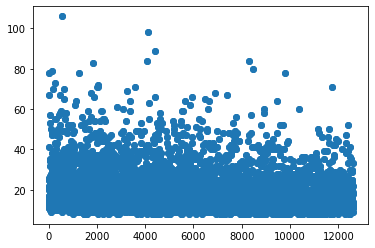

Episode =  6301  Epsilon =  0.3158827311914027
Episode =  6302  Epsilon =  0.3158511446555689
Episode =  6303  Epsilon =  0.3158164031141837
Episode =  6304  Epsilon =  0.31578798105902495
Episode =  6305  Epsilon =  0.3157343019334948
Episode =  6306  Epsilon =  0.3157058872670728
Episode =  6307  Epsilon =  0.3156553786184523
Episode =  6308  Epsilon =  0.3156301273244841
Episode =  6309  Epsilon =  0.3155985660476477
Episode =  6310  Epsilon =  0.3155196766621655
Episode =  6311  Epsilon =  0.31548181676190445
Episode =  6312  Epsilon =  0.31544711584415025
Episode =  6313  Epsilon =  0.3154092646506214
Episode =  6314  Epsilon =  0.3153808792360923
Episode =  6315  Epsilon =  0.31527997400495933
Episode =  6316  Epsilon =  0.31525475274200887
Episode =  6317  Epsilon =  0.31522007679979824
Episode =  6318  Epsilon =  0.31517594929868026
Episode =  6319  Epsilon =  0.31512237420918576
Episode =  6320  Epsilon =  0.3150908637048684
Episode =  6321  Epsilon =  0.31506250694499166
Epis

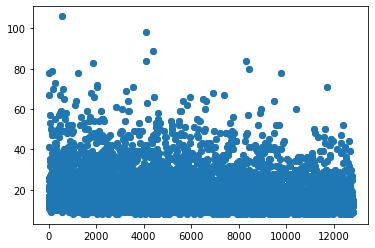

Episode =  6401  Epsilon =  0.31141334462782416
Episode =  6402  Epsilon =  0.31137909121515384
Episode =  6403  Epsilon =  0.31133861476670366
Episode =  6404  Epsilon =  0.31130436957382485
Episode =  6405  Epsilon =  0.3112701281476914
Episode =  6406  Epsilon =  0.31123900284679373
Episode =  6407  Epsilon =  0.3111798733493796
Episode =  6408  Epsilon =  0.3111549800797216
Episode =  6409  Epsilon =  0.3111207550854465
Episode =  6410  Epsilon =  0.31109275561748073
Episode =  6411  Epsilon =  0.3110585374674858
Episode =  6412  Epsilon =  0.3109932223595186
Episode =  6413  Epsilon =  0.31095279607050835
Episode =  6414  Epsilon =  0.31091237503654795
Episode =  6415  Epsilon =  0.31088439432184883
Episode =  6416  Epsilon =  0.3108501990902213
Episode =  6417  Epsilon =  0.31081600761984357
Episode =  6418  Epsilon =  0.3107787121231806
Episode =  6419  Epsilon =  0.31073209904549515
Episode =  6420  Epsilon =  0.3106575326628788
Episode =  6421  Epsilon =  0.3106047256350849
Ep

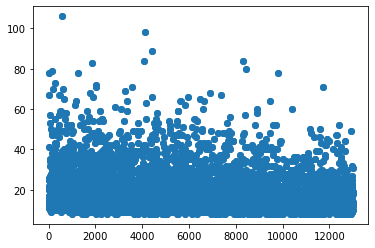

Episode =  6501  Epsilon =  0.30697956560818795
Episode =  6502  Epsilon =  0.30693659169211607
Episode =  6503  Epsilon =  0.30685679895074464
Episode =  6504  Epsilon =  0.3068261149584943
Episode =  6505  Epsilon =  0.30676475617837823
Episode =  6506  Epsilon =  0.3067279468002901
Episode =  6507  Epsilon =  0.3066635410163341
Episode =  6508  Epsilon =  0.306583819258555
Episode =  6509  Epsilon =  0.30654396615182444
Episode =  6510  Epsilon =  0.30649185836740395
Episode =  6511  Epsilon =  0.3064520172147524
Episode =  6512  Epsilon =  0.30642443791218654
Episode =  6513  Epsilon =  0.3063937971536621
Episode =  6514  Epsilon =  0.30631414551982017
Episode =  6515  Epsilon =  0.3062804529853985
Episode =  6516  Epsilon =  0.3062406393135229
Episode =  6517  Epsilon =  0.3061855212348119
Episode =  6518  Epsilon =  0.3061426584766152
Episode =  6519  Epsilon =  0.30602940721200955
Episode =  6520  Epsilon =  0.3059926860700618
Episode =  6521  Epsilon =  0.3058733727866616
Episo

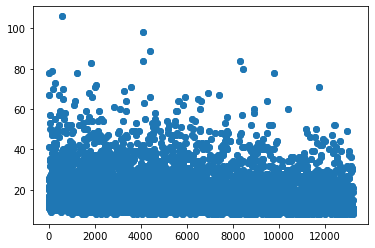

Episode =  6601  Epsilon =  0.30253629590455977
Episode =  6602  Epsilon =  0.3025090689992917
Episode =  6603  Epsilon =  0.30247881975612495
Episode =  6604  Epsilon =  0.30244252465697863
Episode =  6605  Epsilon =  0.30241228206787996
Episode =  6606  Epsilon =  0.302385066323299
Episode =  6607  Epsilon =  0.30235482947971787
Episode =  6608  Epsilon =  0.3023094798833479
Episode =  6609  Epsilon =  0.3022732051036655
Episode =  6610  Epsilon =  0.30224297944559103
Episode =  6611  Epsilon =  0.30220066860185024
Episode =  6612  Epsilon =  0.3021281495066196
Episode =  6613  Epsilon =  0.30207679234347107
Episode =  6614  Epsilon =  0.30204356588993353
Episode =  6615  Epsilon =  0.30200128296199696
Episode =  6616  Epsilon =  0.30197108449464116
Episode =  6617  Epsilon =  0.30193786966826947
Episode =  6618  Epsilon =  0.3019106966186698
Episode =  6619  Epsilon =  0.301795992922554
Episode =  6620  Epsilon =  0.301750727144962
Episode =  6621  Epsilon =  0.3017115022962272
Epis

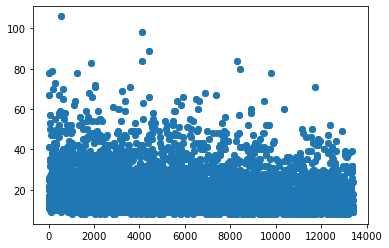

Episode =  6701  Epsilon =  0.2981185810327806
Episode =  6702  Epsilon =  0.29808280912827284
Episode =  6703  Epsilon =  0.2980530024867497
Episode =  6704  Epsilon =  0.29802319882572675
Episode =  6705  Epsilon =  0.2979725394413922
Episode =  6706  Epsilon =  0.297933805722679
Episode =  6707  Epsilon =  0.297895077038997
Episode =  6708  Epsilon =  0.29784443943340605
Episode =  6709  Epsilon =  0.2977878546485615
Episode =  6710  Epsilon =  0.29774021264148914
Episode =  6711  Epsilon =  0.29771044025773047
Episode =  6712  Epsilon =  0.2976509044211392
Episode =  6713  Epsilon =  0.29759138049046513
Episode =  6714  Epsilon =  0.29755567184591053
Episode =  6715  Epsilon =  0.2974872422532377
Episode =  6716  Epsilon =  0.29743964834006054
Episode =  6717  Epsilon =  0.2974128801101391
Episode =  6718  Epsilon =  0.2973831404578334
Episode =  6719  Epsilon =  0.29734448335562474
Episode =  6720  Epsilon =  0.29729691228192984
Episode =  6721  Epsilon =  0.2972107091084468
Episo

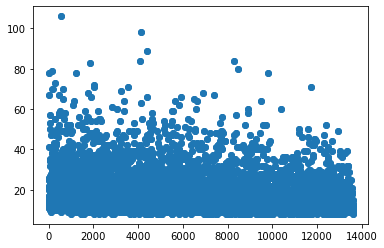

Episode =  6801  Epsilon =  0.29430051193350676
Episode =  6802  Epsilon =  0.2942681408194931
Episode =  6803  Epsilon =  0.2942357732660883
Episode =  6804  Epsilon =  0.2942034092729008
Episode =  6805  Epsilon =  0.2941798740592558
Episode =  6806  Epsilon =  0.2941475162146121
Episode =  6807  Epsilon =  0.2940857520304932
Episode =  6808  Epsilon =  0.29401812042361614
Episode =  6809  Epsilon =  0.29398284054239937
Episode =  6810  Epsilon =  0.29393580728583896
Episode =  6811  Epsilon =  0.29390935438584576
Episode =  6812  Epsilon =  0.2938711488442168
Episode =  6813  Epsilon =  0.2938447017631922
Episode =  6814  Epsilon =  0.29378006336248014
Episode =  6815  Epsilon =  0.2937213135187362
Episode =  6816  Epsilon =  0.29367725884616414
Episode =  6817  Epsilon =  0.29365376572265917
Episode =  6818  Epsilon =  0.2936185295611648
Episode =  6819  Epsilon =  0.293592105214739
Episode =  6820  Epsilon =  0.2935510054025614
Episode =  6821  Epsilon =  0.29352165191648694
Episo

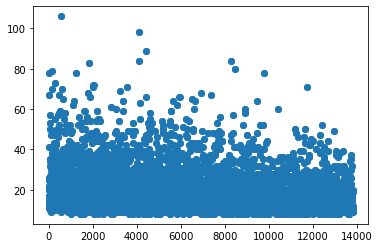

Episode =  6901  Epsilon =  0.2902351522650966
Episode =  6902  Epsilon =  0.29018001310024766
Episode =  6903  Epsilon =  0.2901538982048306
Episode =  6904  Epsilon =  0.29009877447670945
Episode =  6905  Epsilon =  0.290072666892403
Episode =  6906  Epsilon =  0.29004076081344143
Episode =  6907  Epsilon =  0.29001175833252024
Episode =  6908  Epsilon =  0.28996826004871395
Episode =  6909  Epsilon =  0.2899334661191548
Episode =  6910  Epsilon =  0.28991027248559076
Episode =  6911  Epsilon =  0.2898754855140869
Episode =  6912  Epsilon =  0.2898493980247823
Episode =  6913  Epsilon =  0.2898204146790876
Episode =  6914  Epsilon =  0.2897856384898196
Episode =  6915  Epsilon =  0.28973927672850913
Episode =  6916  Epsilon =  0.2896668513250056
Episode =  6917  Epsilon =  0.28960602797701823
Episode =  6918  Epsilon =  0.28957706896698976
Episode =  6919  Epsilon =  0.289545217400529
Episode =  6920  Epsilon =  0.28948441959285626
Episode =  6921  Epsilon =  0.28944389481353733
Epis

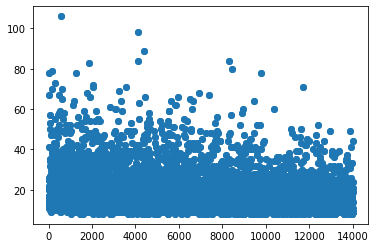

Episode =  7001  Epsilon =  0.28609431698783233
Episode =  7002  Epsilon =  0.28606284850110414
Episode =  7003  Epsilon =  0.2860285231904699
Episode =  7004  Epsilon =  0.285977042947057
Episode =  7005  Epsilon =  0.28594272793242
Episode =  7006  Epsilon =  0.2859055579797373
Episode =  7007  Epsilon =  0.28587411025525433
Episode =  7008  Epsilon =  0.28583694922224523
Episode =  7009  Epsilon =  0.2857569264802823
Episode =  7010  Epsilon =  0.28565692955647964
Episode =  7011  Epsilon =  0.2855769572127149
Episode =  7012  Epsilon =  0.28555125657161484
Episode =  7013  Epsilon =  0.28552270301642646
Episode =  7014  Epsilon =  0.2854941523164367
Episode =  7015  Epsilon =  0.28546560447136
Episode =  7016  Epsilon =  0.28542849654038555
Episode =  7017  Epsilon =  0.2852772602745486
Episode =  7018  Epsilon =  0.28524873411748314
Episode =  7019  Epsilon =  0.2852230630149847
Episode =  7020  Epsilon =  0.28519454227734714
Episode =  7021  Epsilon =  0.28516602439162647
Episode

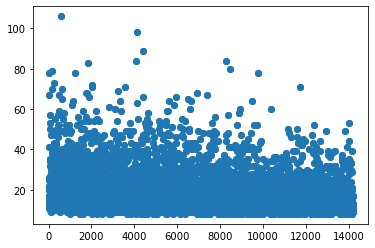

Episode =  7101  Epsilon =  0.28202948090256974
Episode =  7102  Epsilon =  0.2819646219053268
Episode =  7103  Epsilon =  0.28192796907022855
Episode =  7104  Epsilon =  0.28189977782386316
Episode =  7105  Epsilon =  0.28186877070876015
Episode =  7106  Epsilon =  0.2817898588956891
Episode =  7107  Epsilon =  0.2817504112740792
Episode =  7108  Epsilon =  0.28172223778251687
Episode =  7109  Epsilon =  0.28168279962715276
Episode =  7110  Epsilon =  0.2816518163782194
Episode =  7111  Epsilon =  0.28161520420499336
Episode =  7112  Epsilon =  0.28153917874388323
Episode =  7113  Epsilon =  0.2814856916487915
Episode =  7114  Epsilon =  0.2814406577661032
Episode =  7115  Epsilon =  0.28141251524818817
Episode =  7116  Epsilon =  0.2813534251201164
Episode =  7117  Epsilon =  0.2812352820840537
Episode =  7118  Epsilon =  0.2812071601025773
Episode =  7119  Epsilon =  0.2811677940526805
Episode =  7120  Epsilon =  0.2811059442509647
Episode =  7121  Epsilon =  0.28107502445231575
Epi

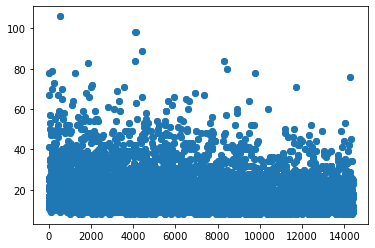

Episode =  7201  Epsilon =  0.2775806959642499
Episode =  7202  Epsilon =  0.2775557149506803
Episode =  7203  Epsilon =  0.27753073618528945
Episode =  7204  Epsilon =  0.27750575966787516
Episode =  7205  Epsilon =  0.27747523586577016
Episode =  7206  Epsilon =  0.2774419410016718
Episode =  7207  Epsilon =  0.27730602843144075
Episode =  7208  Epsilon =  0.2772699811711031
Episode =  7209  Epsilon =  0.27722562174476095
Episode =  7210  Epsilon =  0.27715909591158966
Episode =  7211  Epsilon =  0.27712583898182014
Episode =  7212  Epsilon =  0.2770981279220529
Episode =  7213  Epsilon =  0.27707041963323925
Episode =  7214  Epsilon =  0.2770371733439314
Episode =  7215  Epsilon =  0.2770122412449519
Episode =  7216  Epsilon =  0.276976232174275
Episode =  7217  Epsilon =  0.2769319197437776
Episode =  7218  Epsilon =  0.276901459060277
Episode =  7219  Epsilon =  0.2768765391749723
Episode =  7220  Epsilon =  0.2768516215323451
Episode =  7221  Epsilon =  0.2767990249840662
Episode

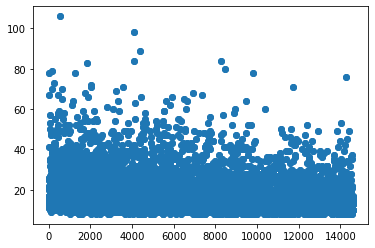

Episode =  7301  Epsilon =  0.27354927230889253
Episode =  7302  Epsilon =  0.27351097828288323
Episode =  7303  Epsilon =  0.2734808938803662
Episode =  7304  Epsilon =  0.27342346920957533
Episode =  7305  Epsilon =  0.2733933944324788
Episode =  7306  Epsilon =  0.27336605659663893
Episode =  7307  Epsilon =  0.27333052149678777
Episode =  7308  Epsilon =  0.27329772396608654
Episode =  7309  Epsilon =  0.27327039569676703
Episode =  7310  Epsilon =  0.2732430701601242
Episode =  7311  Epsilon =  0.2731884272837755
Episode =  7312  Epsilon =  0.2731611099435233
Episode =  7313  Epsilon =  0.2731228702561696
Episode =  7314  Epsilon =  0.27309282854297406
Episode =  7315  Epsilon =  0.2730218339922161
Episode =  7316  Epsilon =  0.27299453331037676
Episode =  7317  Epsilon =  0.27289900242025206
Episode =  7318  Epsilon =  0.27287171402089433
Episode =  7319  Epsilon =  0.27284169993322716
Episode =  7320  Epsilon =  0.2727298583245574
Episode =  7321  Epsilon =  0.27270258683867893


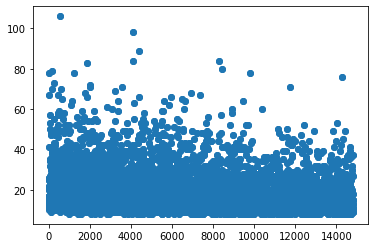

Episode =  7401  Epsilon =  0.2695117085014806
Episode =  7402  Epsilon =  0.2694739796920121
Episode =  7403  Epsilon =  0.26944703377609036
Episode =  7404  Epsilon =  0.26942278475551756
Episode =  7405  Epsilon =  0.2693877622451239
Episode =  7406  Epsilon =  0.2693473573132569
Episode =  7407  Epsilon =  0.2693150377311904
Episode =  7408  Epsilon =  0.2692234866406832
Episode =  7409  Epsilon =  0.2691750310165023
Episode =  7410  Epsilon =  0.2691454235395685
Episode =  7411  Epsilon =  0.2691212016625598
Episode =  7412  Epsilon =  0.26909429102250076
Episode =  7413  Epsilon =  0.2690189555451498
Episode =  7414  Epsilon =  0.26899743499714196
Episode =  7415  Epsilon =  0.2689221266355459
Episode =  7416  Epsilon =  0.2688925469764249
Episode =  7417  Epsilon =  0.2688441509157249
Episode =  7418  Epsilon =  0.2688199561518966
Episode =  7419  Epsilon =  0.26879307563473187
Episode =  7420  Epsilon =  0.2687500723979966
Episode =  7421  Epsilon =  0.2686640865632243
Episode 

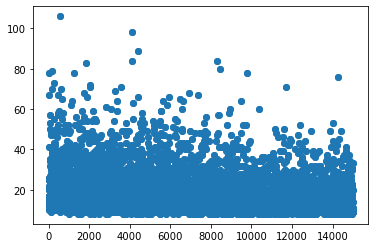

Episode =  7501  Epsilon =  0.2656346602797201
Episode =  7502  Epsilon =  0.2656054422202019
Episode =  7503  Epsilon =  0.2655762273744774
Episode =  7504  Epsilon =  0.2655231177056939
Episode =  7505  Epsilon =  0.2654965668542419
Episode =  7506  Epsilon =  0.2654647093369957
Episode =  7507  Epsilon =  0.2654222385936049
Episode =  7508  Epsilon =  0.2653930438990703
Episode =  7509  Epsilon =  0.26536385241575944
Episode =  7510  Epsilon =  0.26533731748996053
Episode =  7511  Epsilon =  0.2653134383253605
Episode =  7512  Epsilon =  0.2652869084406933
Episode =  7513  Epsilon =  0.2652630338126808
Episode =  7514  Epsilon =  0.26523650896818773
Episode =  7515  Epsilon =  0.26517286016244057
Episode =  7516  Epsilon =  0.2650906697269169
Episode =  7517  Epsilon =  0.26504560836869345
Episode =  7518  Epsilon =  0.26501380496294824
Episode =  7519  Epsilon =  0.26498730503996937
Episode =  7520  Epsilon =  0.26490782116905237
Episode =  7521  Epsilon =  0.26483630606988384
Epis

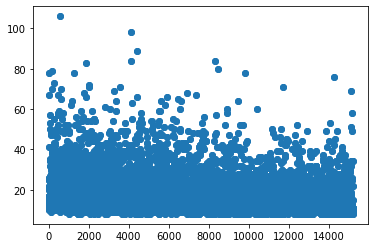

Episode =  7601  Epsilon =  0.26124586892548946
Episode =  7602  Epsilon =  0.2612223579728493
Episode =  7603  Epsilon =  0.26119362523746487
Episode =  7604  Epsilon =  0.2611675073114485
Episode =  7605  Epsilon =  0.26108394749718994
Episode =  7606  Epsilon =  0.2610473984857754
Episode =  7607  Epsilon =  0.26102129518162986
Episode =  7608  Epsilon =  0.2609951944876712
Episode =  7609  Epsilon =  0.260966486738771
Episode =  7610  Epsilon =  0.26093517279580575
Episode =  7611  Epsilon =  0.2609116898044192
Episode =  7612  Epsilon =  0.26088560007039546
Episode =  7613  Epsilon =  0.2608125626932716
Episode =  7614  Epsilon =  0.260778659433397
Episode =  7615  Epsilon =  0.2607577980794141
Episode =  7616  Epsilon =  0.2607317237337165
Episode =  7617  Epsilon =  0.2606926171037597
Episode =  7618  Epsilon =  0.26065872943572016
Episode =  7619  Epsilon =  0.2606352713229921
Episode =  7620  Epsilon =  0.26060660316326456
Episode =  7621  Epsilon =  0.26055448731496883
Episod

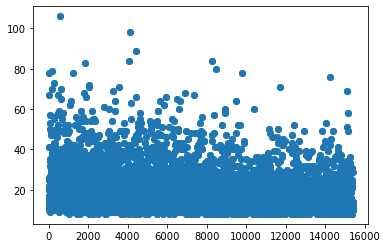

Episode =  7701  Epsilon =  0.25749802822041373
Episode =  7702  Epsilon =  0.25747485455657243
Episode =  7703  Epsilon =  0.25741821660216246
Episode =  7704  Epsilon =  0.2573796069585154
Episode =  7705  Epsilon =  0.25735387041335056
Episode =  7706  Epsilon =  0.25733070972306327
Episode =  7707  Epsilon =  0.25729983204498214
Episode =  7708  Epsilon =  0.2572715307615623
Episode =  7709  Epsilon =  0.25725094996524783
Episode =  7710  Epsilon =  0.2572252262850749
Episode =  7711  Epsilon =  0.2571995051771283
Episode =  7712  Epsilon =  0.25715578519615107
Episode =  7713  Epsilon =  0.2571069304825814
Episode =  7714  Epsilon =  0.2570812212035645
Episode =  7715  Epsilon =  0.2570580850504791
Episode =  7716  Epsilon =  0.25703495097954343
Episode =  7717  Epsilon =  0.25700667883129263
Episode =  7718  Epsilon =  0.2569861192221791
Episode =  7719  Epsilon =  0.25695785244509944
Episode =  7720  Epsilon =  0.25693215807306635
Episode =  7721  Epsilon =  0.25690389723135687


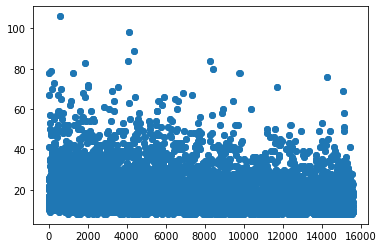

Episode =  7801  Epsilon =  0.25414936061902477
Episode =  7802  Epsilon =  0.2541137823769639
Episode =  7803  Epsilon =  0.2540553432199727
Episode =  7804  Epsilon =  0.25403247938228984
Episode =  7805  Epsilon =  0.2539892977472454
Episode =  7806  Epsilon =  0.25395882101253964
Episode =  7807  Epsilon =  0.2539232694440231
Episode =  7808  Epsilon =  0.25388264517406106
Episode =  7809  Epsilon =  0.2538547197586446
Episode =  7810  Epsilon =  0.25382425917224793
Episode =  7811  Epsilon =  0.2537963401789063
Episode =  7812  Epsilon =  0.25376081135600037
Episode =  7813  Epsilon =  0.2537328993414998
Episode =  7814  Epsilon =  0.25371006452231515
Episode =  7815  Epsilon =  0.25366440104885385
Episode =  7816  Epsilon =  0.2536390360038472
Episode =  7817  Epsilon =  0.2536136734952056
Episode =  7818  Epsilon =  0.2535857776648986
Episode =  7819  Epsilon =  0.2535629560860028
Episode =  7820  Epsilon =  0.25353760118493457
Episode =  7821  Epsilon =  0.2535021085827713
Epis

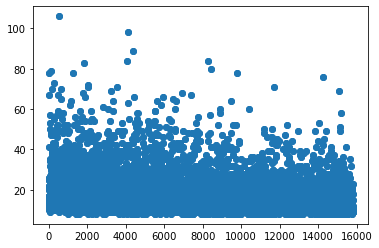

Episode =  7901  Epsilon =  0.2508868881466922
Episode =  7902  Epsilon =  0.2508643094557084
Episode =  7903  Epsilon =  0.2508417327967053
Episode =  7904  Epsilon =  0.2508066175878112
Episode =  7905  Epsilon =  0.2507865539612778
Episode =  7906  Epsilon =  0.2507639842999192
Episode =  7907  Epsilon =  0.25073890928063575
Episode =  7908  Epsilon =  0.2507163439070841
Episode =  7909  Epsilon =  0.2506887667639103
Episode =  7910  Epsilon =  0.2506611926540402
Episode =  7911  Epsilon =  0.250611065679008
Episode =  7912  Epsilon =  0.25058851181080516
Episode =  7913  Epsilon =  0.25056595997234904
Episode =  7914  Epsilon =  0.2505258728262458
Episode =  7915  Epsilon =  0.2504908018344312
Episode =  7916  Epsilon =  0.2504457177732079
Episode =  7917  Epsilon =  0.25041566624046036
Episode =  7918  Epsilon =  0.25038561831366235
Episode =  7919  Epsilon =  0.250345560019772
Episode =  7920  Epsilon =  0.25032052684061534
Episode =  7921  Epsilon =  0.2502954961646389
Episode =

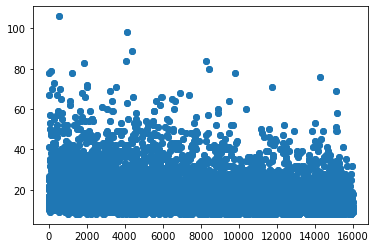

Episode =  8001  Epsilon =  0.24779015897488946
Episode =  8002  Epsilon =  0.24776785897559642
Episode =  8003  Epsilon =  0.24774060614630594
Episode =  8004  Epsilon =  0.2477133563146469
Episode =  8005  Epsilon =  0.24769106322724763
Episode =  8006  Epsilon =  0.24766877214612595
Episode =  8007  Epsilon =  0.2476118151636205
Episode =  8008  Epsilon =  0.24758705534391445
Episode =  8009  Epsilon =  0.24755982240183017
Episode =  8010  Epsilon =  0.24752516662593324
Episode =  8011  Epsilon =  0.24745092058463758
Episode =  8012  Epsilon =  0.24742122840419434
Episode =  8013  Epsilon =  0.24739648764211608
Episode =  8014  Epsilon =  0.24737422307147156
Episode =  8015  Epsilon =  0.2472876576760501
Episode =  8016  Epsilon =  0.2472382053371746
Episode =  8017  Epsilon =  0.24721348287639644
Episode =  8018  Epsilon =  0.24718381918662627
Episode =  8019  Epsilon =  0.2471442731370544
Episode =  8020  Epsilon =  0.2471146177519131
Episode =  8021  Epsilon =  0.2470923785482903

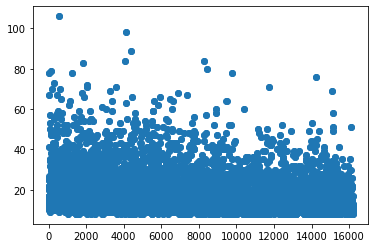

Episode =  8101  Epsilon =  0.2444748210388929
Episode =  8102  Epsilon =  0.24445037490134658
Episode =  8103  Epsilon =  0.24441615441545222
Episode =  8104  Epsilon =  0.24439415806138706
Episode =  8105  Epsilon =  0.24436238904471452
Episode =  8106  Epsilon =  0.2443257376185401
Episode =  8107  Epsilon =  0.2442964204356775
Episode =  8108  Epsilon =  0.24424268140338637
Episode =  8109  Epsilon =  0.24420848999240108
Episode =  8110  Epsilon =  0.2441132677269626
Episode =  8111  Epsilon =  0.24407909443253323
Episode =  8112  Epsilon =  0.24403028373893154
Episode =  8113  Epsilon =  0.24397660324998086
Episode =  8114  Epsilon =  0.24394976743379895
Episode =  8115  Epsilon =  0.24392293456937975
Episode =  8116  Epsilon =  0.24388634905610346
Episode =  8117  Epsilon =  0.24386196176251895
Episode =  8118  Epsilon =  0.24384245368345164
Episode =  8119  Epsilon =  0.24381563262283673
Episode =  8120  Epsilon =  0.2437888145123615
Episode =  8121  Epsilon =  0.243764436971694

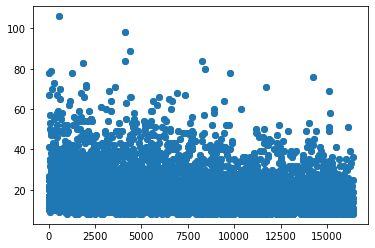

Episode =  8201  Epsilon =  0.2413196461172393
Episode =  8202  Epsilon =  0.2412979284349872
Episode =  8203  Epsilon =  0.2412689745656108
Episode =  8204  Epsilon =  0.2412448489950804
Episode =  8205  Epsilon =  0.24122072583697438
Episode =  8206  Epsilon =  0.24116284009876776
Episode =  8207  Epsilon =  0.2411411365283517
Episode =  8208  Epsilon =  0.24111702374092195
Episode =  8209  Epsilon =  0.24109291336463826
Episode =  8210  Epsilon =  0.2410495207626463
Episode =  8211  Epsilon =  0.2410230069062201
Episode =  8212  Epsilon =  0.24099890593110285
Episode =  8213  Epsilon =  0.24096757826631202
Episode =  8214  Epsilon =  0.24094107342301965
Episode =  8215  Epsilon =  0.24091457149508513
Episode =  8216  Epsilon =  0.24083508320022198
Episode =  8217  Epsilon =  0.24080377683089543
Episode =  8218  Epsilon =  0.24077729000467987
Episode =  8219  Epsilon =  0.24075321359990137
Episode =  8220  Epsilon =  0.24072432509205666
Episode =  8221  Epsilon =  0.24070025398347814

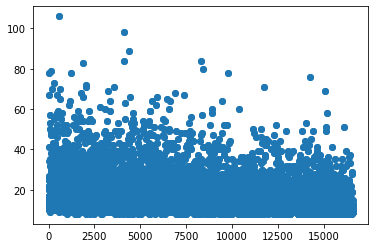

Episode =  8301  Epsilon =  0.23838391167396822
Episode =  8302  Epsilon =  0.23835530746387495
Episode =  8303  Epsilon =  0.23833385655876257
Episode =  8304  Epsilon =  0.23829334344942435
Episode =  8305  Epsilon =  0.23825283722669494
Episode =  8306  Epsilon =  0.23821472001278265
Episode =  8307  Epsilon =  0.2381885179657301
Episode =  8308  Epsilon =  0.23816708207092205
Episode =  8309  Epsilon =  0.2381456481052481
Episode =  8310  Epsilon =  0.2380813577812946
Episode =  8311  Epsilon =  0.23805755095491143
Episode =  8312  Epsilon =  0.23803612684654507
Episode =  8313  Epsilon =  0.23800994444356213
Episode =  8314  Epsilon =  0.23797186608919194
Episode =  8315  Epsilon =  0.2379480702113757
Episode =  8316  Epsilon =  0.23788621206431815
Episode =  8317  Epsilon =  0.2378624247514334
Episode =  8318  Epsilon =  0.2378315048006553
Episode =  8319  Epsilon =  0.23781247913643602
Episode =  8320  Epsilon =  0.23775541127519897
Episode =  8321  Epsilon =  0.2377340143580441

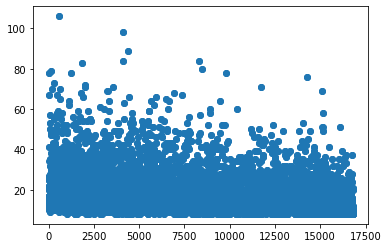

Episode =  8401  Epsilon =  0.23531911120466867
Episode =  8402  Epsilon =  0.23529558058775138
Episode =  8403  Epsilon =  0.2352767577883401
Episode =  8404  Epsilon =  0.23525558393884557
Episode =  8405  Epsilon =  0.2352320596743055
Episode =  8406  Epsilon =  0.23520618570020543
Episode =  8407  Epsilon =  0.23518501820188126
Episode =  8408  Epsilon =  0.2351615009935268
Episode =  8409  Epsilon =  0.23514033751662525
Episode =  8410  Epsilon =  0.23511682477609358
Episode =  8411  Epsilon =  0.23509566531985054
Episode =  8412  Epsilon =  0.23507215704629283
Episode =  8413  Epsilon =  0.23505100160994444
Episode =  8414  Epsilon =  0.23501809693762274
Episode =  8415  Epsilon =  0.23499459642047665
Episode =  8416  Epsilon =  0.23497344796423558
Episode =  8417  Epsilon =  0.2349499519117413
Episode =  8418  Epsilon =  0.23492175975003585
Episode =  8419  Epsilon =  0.23488417546321982
Episode =  8420  Epsilon =  0.23485833975408707
Episode =  8421  Epsilon =  0.23482076561360

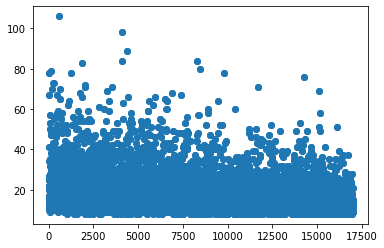

Episode =  8501  Epsilon =  0.23245869984518097
Episode =  8502  Epsilon =  0.2324331309223588
Episode =  8503  Epsilon =  0.23240988888759745
Episode =  8504  Epsilon =  0.23235644102713138
Episode =  8505  Epsilon =  0.2323355299930044
Episode =  8506  Epsilon =  0.23230997461805308
Episode =  8507  Epsilon =  0.23228906776569383
Episode =  8508  Epsilon =  0.23226119488933192
Episode =  8509  Epsilon =  0.23221706967495645
Episode =  8510  Epsilon =  0.2321938492451316
Episode =  8511  Epsilon =  0.23217063113722203
Episode =  8512  Epsilon =  0.2321427724723318
Episode =  8513  Epsilon =  0.23211027492155453
Episode =  8514  Epsilon =  0.23208242349893943
Episode =  8515  Epsilon =  0.2320081693759826
Episode =  8516  Epsilon =  0.23198496983503875
Episode =  8517  Epsilon =  0.2319408970981757
Episode =  8518  Epsilon =  0.2319177042840896
Episode =  8519  Epsilon =  0.23185509526957437
Episode =  8520  Epsilon =  0.23182263799058508
Episode =  8521  Epsilon =  0.23179482108215824

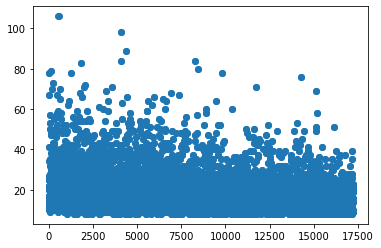

Episode =  8601  Epsilon =  0.2293003331065388
Episode =  8602  Epsilon =  0.22927740433432936
Episode =  8603  Epsilon =  0.22925218533301772
Episode =  8604  Epsilon =  0.22922696910562979
Episode =  8605  Epsilon =  0.22919946365722388
Episode =  8606  Epsilon =  0.22917883673685435
Episode =  8607  Epsilon =  0.22911696711305762
Episode =  8608  Epsilon =  0.22909405667643906
Episode =  8609  Epsilon =  0.22907114853073818
Episode =  8610  Epsilon =  0.22899327796833516
Episode =  8611  Epsilon =  0.22897266960374985
Episode =  8612  Epsilon =  0.22894977359608862
Episode =  8613  Epsilon =  0.22893145843839252
Episode =  8614  Epsilon =  0.22890169943196745
Episode =  8615  Epsilon =  0.22886965559738642
Episode =  8616  Epsilon =  0.22884676989055927
Episode =  8617  Epsilon =  0.22882617471104166
Episode =  8618  Epsilon =  0.2287941414491286
Episode =  8619  Epsilon =  0.22876897560354492
Episode =  8620  Epsilon =  0.2287438125260382
Episode =  8621  Epsilon =  0.2287186522163

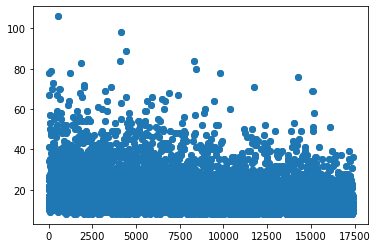

Episode =  8701  Epsilon =  0.22623690666756627
Episode =  8702  Epsilon =  0.22621428422115258
Episode =  8703  Epsilon =  0.22618035479293674
Episode =  8704  Epsilon =  0.22609668396007485
Episode =  8705  Epsilon =  0.22607633627591608
Episode =  8706  Epsilon =  0.22605372988565847
Episode =  8707  Epsilon =  0.2260333860671731
Episode =  8708  Epsilon =  0.22600400378378516
Episode =  8709  Epsilon =  0.2259791448349306
Episode =  8710  Epsilon =  0.2259520291001053
Episode =  8711  Epsilon =  0.22592717586812294
Episode =  8712  Epsilon =  0.22586392543060563
Episode =  8713  Epsilon =  0.2258390818894454
Episode =  8714  Epsilon =  0.2258210155758877
Episode =  8715  Epsilon =  0.22580069270064304
Episode =  8716  Epsilon =  0.22573070568438788
Episode =  8717  Epsilon =  0.2257081338552885
Episode =  8718  Epsilon =  0.22568556428324796
Episode =  8719  Epsilon =  0.22564268831375944
Episode =  8720  Epsilon =  0.2256020764880954
Episode =  8721  Epsilon =  0.22555696081009372

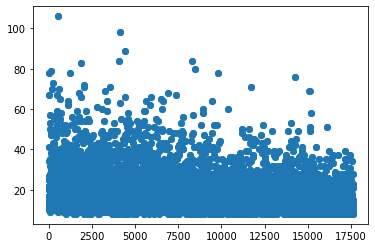

Episode =  8801  Epsilon =  0.22324342687238996
Episode =  8802  Epsilon =  0.22321887156877665
Episode =  8803  Epsilon =  0.22319655090927432
Episode =  8804  Epsilon =  0.22317423248171517
Episode =  8805  Epsilon =  0.22314745331449495
Episode =  8806  Epsilon =  0.2231251397964253
Episode =  8807  Epsilon =  0.22308051945375007
Episode =  8808  Epsilon =  0.2230403687746707
Episode =  8809  Epsilon =  0.2230202961451257
Episode =  8810  Epsilon =  0.22299130553600982
Episode =  8811  Epsilon =  0.22293779431184027
Episode =  8812  Epsilon =  0.2229199600908445
Episode =  8813  Epsilon =  0.22289766932084598
Episode =  8814  Epsilon =  0.22283303869178928
Episode =  8815  Epsilon =  0.22281075661345265
Episode =  8816  Epsilon =  0.22278402106050166
Episode =  8817  Epsilon =  0.2227617438836586
Episode =  8818  Epsilon =  0.22267488417658501
Episode =  8819  Epsilon =  0.22260809206460933
Episode =  8820  Epsilon =  0.222579155038273
Episode =  8821  Epsilon =  0.2225079414595079


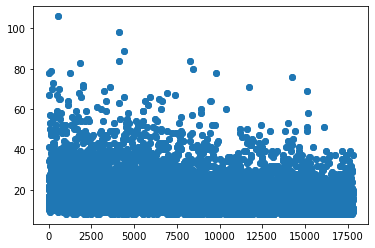

Episode =  8901  Epsilon =  0.22009798803973574
Episode =  8902  Epsilon =  0.22007597945142213
Episode =  8903  Epsilon =  0.2200495720504003
Episode =  8904  Epsilon =  0.22002536804973888
Episode =  8905  Epsilon =  0.2200033667230249
Episode =  8906  Epsilon =  0.21997476828728124
Episode =  8907  Epsilon =  0.21995277202026525
Episode =  8908  Epsilon =  0.21992857866696827
Episode =  8909  Epsilon =  0.21989998995299134
Episode =  8910  Epsilon =  0.2198801999434091
Episode =  8911  Epsilon =  0.2198560145725616
Episode =  8912  Epsilon =  0.2198296335656096
Episode =  8913  Epsilon =  0.21980984988778562
Episode =  8914  Epsilon =  0.21979006799040363
Episode =  8915  Epsilon =  0.21976149728155434
Episode =  8916  Epsilon =  0.21970876111447996
Episode =  8917  Epsilon =  0.21966921729424846
Episode =  8918  Epsilon =  0.2196450551300999
Episode =  8919  Epsilon =  0.2196121110074215
Episode =  8920  Epsilon =  0.21959234690564902
Episode =  8921  Epsilon =  0.21957258458255674

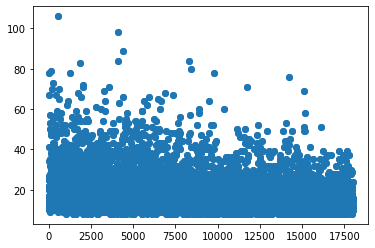

Episode =  9001  Epsilon =  0.2172552462653858
Episode =  9002  Epsilon =  0.21723352193561518
Episode =  9003  Epsilon =  0.21721179977815805
Episode =  9004  Epsilon =  0.21719007979279722
Episode =  9005  Epsilon =  0.21717053366293532
Episode =  9006  Epsilon =  0.21709887956867172
Episode =  9007  Epsilon =  0.2170793416464196
Episode =  9008  Epsilon =  0.21705546435149992
Episode =  9009  Epsilon =  0.21703593033642193
Episode =  9010  Epsilon =  0.21701639807931744
Episode =  9011  Epsilon =  0.21699686758002817
Episode =  9012  Epsilon =  0.21697082964841494
Episode =  9013  Epsilon =  0.2169469642890989
Episode =  9014  Epsilon =  0.21692744003853834
Episode =  9015  Epsilon =  0.21690357945179298
Episode =  9016  Epsilon =  0.21688405910567254
Episode =  9017  Epsilon =  0.21686237189257643
Episode =  9018  Epsilon =  0.21684068684808236
Episode =  9019  Epsilon =  0.21681683580361544
Episode =  9020  Epsilon =  0.216792987382606
Episode =  9021  Epsilon =  0.216769141584765

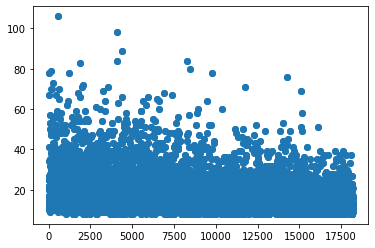

Episode =  9101  Epsilon =  0.21460367904254915
Episode =  9102  Epsilon =  0.21458436567711633
Episode =  9103  Epsilon =  0.2145629084207153
Episode =  9104  Epsilon =  0.21453930791684267
Episode =  9105  Epsilon =  0.21451785516596986
Episode =  9106  Epsilon =  0.21449854952429975
Episode =  9107  Epsilon =  0.214477100849042
Episode =  9108  Epsilon =  0.21445350978343597
Episode =  9109  Epsilon =  0.21442563277859336
Episode =  9110  Epsilon =  0.21439775939750766
Episode =  9111  Epsilon =  0.2143570278964942
Episode =  9112  Epsilon =  0.21433130672505327
Episode =  9113  Epsilon =  0.2142927307546636
Episode =  9114  Epsilon =  0.21427344537317747
Episode =  9115  Epsilon =  0.21425201920709677
Episode =  9116  Epsilon =  0.21420274715554183
Episode =  9117  Epsilon =  0.21417918626703147
Episode =  9118  Epsilon =  0.2141492034297154
Episode =  9119  Epsilon =  0.21411494246942087
Episode =  9120  Epsilon =  0.21409353215275886
Episode =  9121  Epsilon =  0.2140742646982505

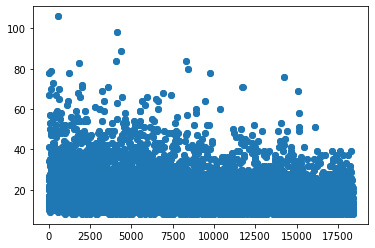

Episode =  9201  Epsilon =  0.21176624328534846
Episode =  9202  Epsilon =  0.21174506782568753
Episode =  9203  Epsilon =  0.2117238944834561
Episode =  9204  Epsilon =  0.21169637230376426
Episode =  9205  Epsilon =  0.21165192095539154
Episode =  9206  Epsilon =  0.2115757403580798
Episode =  9207  Epsilon =  0.21153977571912255
Episode =  9208  Epsilon =  0.2115207380912018
Episode =  9209  Epsilon =  0.2114890125185929
Episode =  9210  Epsilon =  0.2114657501229827
Episode =  9211  Epsilon =  0.21144883362422406
Episode =  9212  Epsilon =  0.21142557564802705
Episode =  9213  Epsilon =  0.21140232023005393
Episode =  9214  Epsilon =  0.21136638506986524
Episode =  9215  Epsilon =  0.21134313616246508
Episode =  9216  Epsilon =  0.2113177766345249
Episode =  9217  Epsilon =  0.21128819436451415
Episode =  9218  Epsilon =  0.21126495405757556
Episode =  9219  Epsilon =  0.21116990669074656
Episode =  9220  Epsilon =  0.2111403451209754
Episode =  9221  Epsilon =  0.21110234346911264

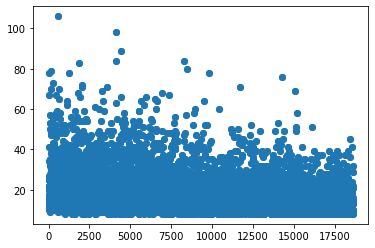

Episode =  9301  Epsilon =  0.20884098182750452
Episode =  9302  Epsilon =  0.20880548205565827
Episode =  9303  Epsilon =  0.20878669050186338
Episode =  9304  Epsilon =  0.20876581298109395
Episode =  9305  Epsilon =  0.20874493754796175
Episode =  9306  Epsilon =  0.20871988978359035
Episode =  9307  Epsilon =  0.20868649743964496
Episode =  9308  Epsilon =  0.2086656299376307
Episode =  9309  Epsilon =  0.20864476452225186
Episode =  9310  Epsilon =  0.20862598743231178
Episode =  9311  Epsilon =  0.20860929810434567
Episode =  9312  Epsilon =  0.20858843832184032
Episode =  9313  Epsilon =  0.20855298147852636
Episode =  9314  Epsilon =  0.20853212732737386
Episode =  9315  Epsilon =  0.20851127526152183
Episode =  9316  Epsilon =  0.20849042528076164
Episode =  9317  Epsilon =  0.2084654080558772
Episode =  9318  Epsilon =  0.208446647107212
Episode =  9319  Epsilon =  0.20840913027493252
Episode =  9320  Epsilon =  0.20839037439101435
Episode =  9321  Epsilon =  0.20835286768686

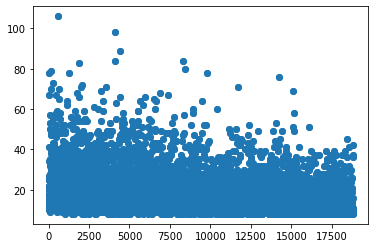

Episode =  9401  Epsilon =  0.2061065309740449
Episode =  9402  Epsilon =  0.2060776782237115
Episode =  9403  Epsilon =  0.2060529505096554
Episode =  9404  Epsilon =  0.20603028604498974
Episode =  9405  Epsilon =  0.20599320411638447
Episode =  9406  Epsilon =  0.20597260592889
Episode =  9407  Epsilon =  0.20594789082268977
Episode =  9408  Epsilon =  0.20592111947091477
Episode =  9409  Epsilon =  0.2059005284914884
Episode =  9410  Epsilon =  0.20587582203401844
Episode =  9411  Epsilon =  0.2058572941364425
Episode =  9412  Epsilon =  0.2058367095391985
Episode =  9413  Epsilon =  0.20581406885961248
Episode =  9414  Epsilon =  0.20578114140749812
Episode =  9415  Epsilon =  0.20575439173162977
Episode =  9416  Epsilon =  0.20573381742406033
Episode =  9417  Epsilon =  0.20569061807448788
Episode =  9418  Epsilon =  0.2056679934639988
Episode =  9419  Epsilon =  0.2056453713420675
Episode =  9420  Epsilon =  0.20562480793593746
Episode =  9421  Epsilon =  0.20557546415024217
Epi

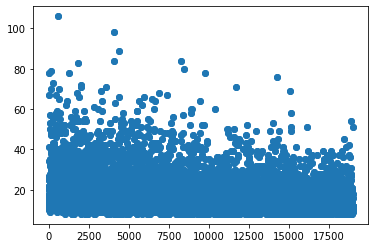

Episode =  9501  Epsilon =  0.20331840420652447
Episode =  9502  Epsilon =  0.20329604052390493
Episode =  9503  Epsilon =  0.20327164658467703
Episode =  9504  Epsilon =  0.2032513205379677
Episode =  9505  Epsilon =  0.20320864245540002
Episode =  9506  Epsilon =  0.2031639416948269
Episode =  9507  Epsilon =  0.2031456578542784
Episode =  9508  Epsilon =  0.20309893995932457
Episode =  9509  Epsilon =  0.20306238562289206
Episode =  9510  Epsilon =  0.20303598936053624
Episode =  9511  Epsilon =  0.20300756645378973
Episode =  9512  Epsilon =  0.20298929668630927
Episode =  9513  Epsilon =  0.20294870308943444
Episode =  9514  Epsilon =  0.20293246792377814
Episode =  9515  Epsilon =  0.20291217579306958
Episode =  9516  Epsilon =  0.20288377021892262
Episode =  9517  Epsilon =  0.20286348295771667
Episode =  9518  Epsilon =  0.20284319772512532
Episode =  9519  Epsilon =  0.2028208863120825
Episode =  9520  Epsilon =  0.202796549387654
Episode =  9521  Epsilon =  0.2027762708480515

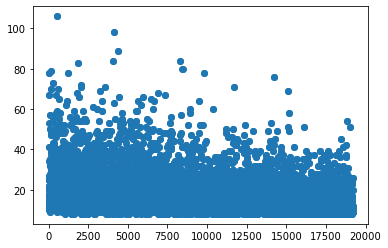

Episode =  9601  Epsilon =  0.20074657818342578
Episode =  9602  Epsilon =  0.20071044723189013
Episode =  9603  Epsilon =  0.2006863635436906
Episode =  9604  Epsilon =  0.2006683026740271
Episode =  9605  Epsilon =  0.2006442240428458
Episode =  9606  Epsilon =  0.20062215450239543
Episode =  9607  Epsilon =  0.20060209339032276
Episode =  9608  Epsilon =  0.200582034284251
Episode =  9609  Epsilon =  0.20056398280375135
Episode =  9610  Epsilon =  0.2005399166901408
Episode =  9611  Epsilon =  0.20051986380139708
Episode =  9612  Epsilon =  0.20048778335009518
Episode =  9613  Epsilon =  0.20046172176260713
Episode =  9614  Epsilon =  0.2004396722962031
Episode =  9615  Epsilon =  0.20042163362764176
Episode =  9616  Epsilon =  0.2003915727875208
Episode =  9617  Epsilon =  0.2003695310370411
Episode =  9618  Epsilon =  0.20034949518592557
Episode =  9619  Epsilon =  0.20032345157464052
Episode =  9620  Epsilon =  0.20029741134878787
Episode =  9621  Epsilon =  0.20027738270924458
E

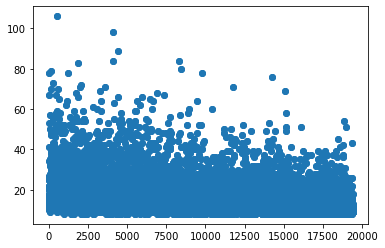

Episode =  9701  Epsilon =  0.19831434414114057
Episode =  9702  Epsilon =  0.19828856508097237
Episode =  9703  Epsilon =  0.19826477199974116
Episode =  9704  Epsilon =  0.19816764654476673
Episode =  9705  Epsilon =  0.1981260359163138
Episode =  9706  Epsilon =  0.1981042433599381
Episode =  9707  Epsilon =  0.19806858798348984
Episode =  9708  Epsilon =  0.19803888007198053
Episode =  9709  Epsilon =  0.1980190772731435
Episode =  9710  Epsilon =  0.19799333659498133
Episode =  9711  Epsilon =  0.19797155863465515
Episode =  9712  Epsilon =  0.1979557216226381
Episode =  9713  Epsilon =  0.19793790649846008
Episode =  9714  Epsilon =  0.19792009297756302
Episode =  9715  Epsilon =  0.1979003020567821
Episode =  9716  Epsilon =  0.1978745768183173
Episode =  9717  Epsilon =  0.19785479044890197
Episode =  9718  Epsilon =  0.1978350060580148
Episode =  9719  Epsilon =  0.19781720179769435
Episode =  9720  Epsilon =  0.1977993991396772
Episode =  9721  Epsilon =  0.19778159808381915


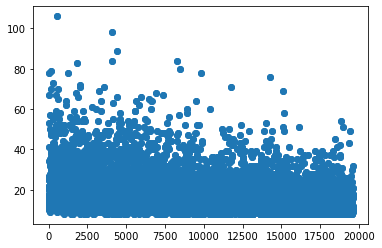

Episode =  9801  Epsilon =  0.19575295557251376
Episode =  9802  Epsilon =  0.1957333813535546
Episode =  9803  Epsilon =  0.19570010967325532
Episode =  9804  Epsilon =  0.19567858395275586
Episode =  9805  Epsilon =  0.19565901717054965
Episode =  9806  Epsilon =  0.19563945234491403
Episode =  9807  Epsilon =  0.19561988947565342
Episode =  9808  Epsilon =  0.1955983725788463
Episode =  9809  Epsilon =  0.19558076960547446
Episode =  9810  Epsilon =  0.19552992546962097
Episode =  9811  Epsilon =  0.1955084184682608
Episode =  9812  Epsilon =  0.19548495898293897
Episode =  9813  Epsilon =  0.1954595477170952
Episode =  9814  Epsilon =  0.19543413975448481
Episode =  9815  Epsilon =  0.195406781026868
Episode =  9816  Epsilon =  0.19538137992344712
Episode =  9817  Epsilon =  0.1953618428600093
Episode =  9818  Epsilon =  0.19532668106875903
Episode =  9819  Epsilon =  0.19529347852128612
Episode =  9820  Epsilon =  0.19525051889654094
Episode =  9821  Epsilon =  0.19523489955790757

In [ ]:
for i in range(episodes):
    print("Episode = ", i, " Epsilon = ", eps)
    state = torch.tensor(env.reset(), dtype=torch.float32)

    done = False
    steps = 0
    eps_rew = 0 
    while not done and steps<max_steps:
        if np.random.uniform(0,1)<eps:
            action = env.action_space.sample()
        else:
            action = np.argmax(model(state).detach().numpy())
        next_state, reward, done, info = env.step(action)
        replay_buffer.append((state, next_state, reward, done, action))
        if len(replay_buffer)>batch_size:
            loss = compute_td_loss(batch_size)
        eps = eps/(1 + decay_val)
        eps_rew += reward 
        if done:
            tot_rewards.append(eps_rew)
            break
        
        state = next_state
        state = torch.tensor(state, dtype=torch.float32)
        steps += 1
    tot_rewards.append(eps_rew)
    
    if(i%100)==0:
        plt.scatter(np.arange(len(tot_rewards)), tot_rewards)
        plt.show()

In [ ]:
#Plot
plt.plot(tot_rewards)

In [25]:
#Render the final environment
state, info = env.reset(seed=42, return_info=True)
import time
for i in range(100):
    
    print("i = ", i)
    env.render()
    
    state = torch.tensor(state, dtype=torch.float32)
    action = np.argmax(model(state).detach().numpy())
    print("action = ", action)
    state, reward, done, info = env.step(action)

    if done:
        state, info = env.reset(return_info=True)
env.close()

i =  0


c:\users\thoma\anaconda3\envs\custom_atari_env\lib\site-packages\gym\core.py:58: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  "You are calling render method, "


action =  3
i =  1


c:\users\thoma\anaconda3\envs\custom_atari_env\lib\site-packages\gym\core.py:58: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  "You are calling render method, "


action =  3
i =  2
action =  3
i =  3
action =  3
i =  4
action =  3
i =  5
action =  3
i =  6
action =  3
i =  7
action =  3
i =  8
action =  3
i =  9
action =  3
i =  10
action =  3
i =  11
action =  3
i =  12
action =  3
i =  13
action =  3
i =  14
action =  3
i =  15
action =  3
i =  16
action =  3
i =  17
action =  3
i =  18
action =  3
i =  19
action =  3
i =  20
action =  3
i =  21
action =  3
i =  22
action =  3
i =  23
action =  3
i =  24
action =  3
i =  25
action =  3
i =  26
action =  3
i =  27
action =  3
i =  28
action =  3
i =  29
action =  3
i =  30
action =  3
i =  31
action =  3
i =  32
action =  3
i =  33
action =  3
i =  34
action =  3
i =  35
action =  3
i =  36
action =  3
i =  37
action =  3
i =  38
action =  3
i =  39
action =  3
i =  40
action =  3
i =  41
action =  3
i =  42
action =  3
i =  43
action =  3
i =  44
action =  3
i =  45
action =  3
i =  46
action =  3
i =  47
action =  3
i =  48
action =  3
i =  49
action =  3
i =  50
action =  3
i =  51
action =

KeyboardInterrupt: 

In [30]:
print(eps)

4.865155277991983e-08
